In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import pickle

# Load Data

In [19]:
with open('../data_splits/mental-health-full/people_dict_unfiltered_expanded.pickle', 'rb') as handle:
    people_dict = pickle.load(handle)


data_df = pd.read_csv('../data_generation/adherence_export_expanded.csv')
data_df

,mci_uniq_id,relative_ym,race_common_desc,ethnic_common_desc,legal_sex_common_desc,ed_lvl_common_desc,non_covered_days,covered_by_injectable,covered_by,age,ind_302,ind_jail,ind_death,predicted_PRO_MORTALITY_12MO,predicted_PRO_JAILSTAY_12MO,predicted_PRO_OVERDOSE_12MO,predicted_PRO_302_12MO,predicted_PRO_SHELTER_STAY_12MO
0,06104d172d8be267d6333c60ae480426,0.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,UNDERGRAD~Some College,0.000000,0,olanzapine,48,0,0,0,0.005327,0.022756,0.000653,0.003653,0.021936
1,06104d172d8be267d6333c60ae480426,1.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,UNDERGRAD~Some College,0.000000,0,olanzapine,48,0,0,0,0.005327,0.022756,0.000653,0.003653,0.021936
2,06104d172d8be267d6333c60ae480426,2.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,UNDERGRAD~Some College,0.419355,0,olanzapine,48,0,0,0,0.005327,0.022756,0.000653,0.003653,0.021936
3,06104d172d8be267d6333c60ae480426,3.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,UNDERGRAD~Some College,1.000000,0,NaN,48,0,0,0,0.006181,0.058112,0.001167,0.003778,0.023075
4,06104d172d8be267d6333c60ae480426,4.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,UNDERGRAD~Some College,1.000000,0,NaN,49,0,0,0,0.006629,0.073386,0.001299,0.004542,0.039367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466400,5b892d32a4cb9d39d4aa4936539415b9,2.0,1~White,2~Not Hispanic/Latinx,1~Male,99~Unknown,0.000000,0,"risperidone,haloperidol",25,0,0,0,0.002813,0.003732,0.000628,0.002818,0.005360
466401,5b892d32a4cb9d39d4aa4936539415b9,3.0,1~White,2~Not Hispanic/Latinx,1~Male,99~Unknown,0.166667,0,"risperidone,haloperidol",25,0,0,0,0.002411,0.004547,0.000392,0.003012,0.005389
466402,5b892d32a4cb9d39d4aa4936539415b9,4.0,1~White,2~Not Hispanic/Latinx,1~Male,99~Unknown,1.000000,0,NaN,25,0,0,0,0.005960,0.006138,0.000711,0.003100,0.004079
466403,5b892d32a4cb9d39d4aa4936539415b9,5.0,1~White,2~Not Hispanic/Latinx,1~Male,99~Unknown,1.000000,0,NaN,25,0,0,0,0.003770,0.006161,0.000513,0.003667,0.005981


In [20]:
EXPERIMENT_TYPE = "Composite Event"

# New Features Analysis

### Drug Type

In [21]:
# Assert that whenever 'non_covered_days' is 1, 'covered_by_injectable' is always 0
assert data_df.loc[data_df['non_covered_days'] == 1]['covered_by_injectable'].values.sum()==0, \
    "Condition failed: Not all rows with 'non_covered_days' == 1 have 'covered_by_injectable' == 0."

# Assert that whenever 'non_covered_days' is 1, 'covered_by' is always NaN
assert data_df.loc[data_df['non_covered_days'] == 1]['covered_by'].isna().all(), \
    "Condition failed: Not all rows with 'non_covered_days' == 1 have 'covered_by' == NaN."

# Assert that whenever 'non_covered_days' is less than 1, 'covered_by' is always not NaN
print(f"Number of patients with non_covered_days < 1 and null covered_by: {data_df.loc[data_df['covered_by'].isna() & (data_df['non_covered_days'] < 1)].shape[0]}")

data_df.loc[data_df['covered_by'].isna() & (data_df['non_covered_days'] < 1)]

Number of patients with non_covered_days < 1 and null covered_by: 567


,mci_uniq_id,relative_ym,race_common_desc,ethnic_common_desc,legal_sex_common_desc,ed_lvl_common_desc,non_covered_days,covered_by_injectable,covered_by,age,ind_302,ind_jail,ind_death,predicted_PRO_MORTALITY_12MO,predicted_PRO_JAILSTAY_12MO,predicted_PRO_OVERDOSE_12MO,predicted_PRO_302_12MO,predicted_PRO_SHELTER_STAY_12MO
2580,e4bd5e1d5c1f52f34040b93cec9220f8,60.0,1~White,2~Not Hispanic/Latinx,1~Male,9-12~High School (grade 9-12),0.967742,0,NaN,21,0,0,0,0.002677,0.005657,0.000770,0.024028,0.012581
2859,b67a9264f96ee8d25a68e335691eb903,2.0,4~Asian,2~Not Hispanic/Latinx,2~Female,99~Unknown,0.967742,0,NaN,51,0,0,0,0.001915,0.000936,0.000491,0.005576,0.003657
3319,1b524b987d524b38e322f297d8c496de,5.0,1~White,2~Not Hispanic/Latinx,1~Male,9-12~High School (grade 9-12),0.966667,0,NaN,27,0,0,0,0.008105,0.018218,0.005661,0.023815,0.024245
3709,c784bd1a67f682e06b86cdfa3b3eb692,31.0,1~White,2~Not Hispanic/Latinx,2~Female,9-12~High School (grade 9-12),0.966667,0,NaN,53,0,0,0,0.007785,0.001463,0.001908,0.007455,0.002641
3896,2f7d61dd111f0a81463deb119eaf5fee,7.0,1~White,2~Not Hispanic/Latinx,2~Female,9-12~High School (grade 9-12),0.966667,0,NaN,27,0,0,0,0.007998,0.002614,0.001215,0.017958,0.009393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463116,e73b9093ef2884b40b899483310da83a,5.0,1~White,2~Not Hispanic/Latinx,2~Female,99~Unknown,0.967742,0,NaN,29,1,0,0,0.006176,0.002408,0.000403,0.019694,0.003338
463838,cc23d1f099087f961b559f3b6533746e,20.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,9-12~High School (grade 9-12),0.967742,0,NaN,23,0,0,0,0.002406,0.007223,0.001190,0.123073,0.052495
464054,d9e9dc6458b991815e789a5202d8ee82,7.0,2~Black/African American,2~Not Hispanic/Latinx,1~Male,9-12~High School (grade 9-12),0.967742,0,NaN,43,0,0,0,0.025573,0.379160,0.003155,0.134791,0.507748
464431,f311d7a2e73ba6855bbfd743b68853c3,3.0,1~White,2~Not Hispanic/Latinx,2~Female,9-12~High School (grade 9-12),0.967742,0,NaN,32,0,0,0,0.005732,0.155767,0.001556,0.002839,0.016315


In [22]:
count_correct = 0
count_incorrect = 0

for person_id, refill_month in data_df.loc[data_df['covered_by'].isna() & (data_df['non_covered_days'] < 1)][['mci_uniq_id', 'relative_ym']].values:
    if people_dict[person_id]['relative_ym'][people_dict[person_id]['death_time']] > refill_month:
        # print(f"Person ID: {person_id[:5]}, Refill Month: {refill_month:.3f}, Death Month: {people_dict[person_id]['relative_ym'][people_dict[person_id]['death_time']]:.3f}")
        # print()
        count_incorrect += 1
    else:
        count_correct += 1

print(f"Number of patients with non_covered_days < 1 and null covered_by that are correct: {count_correct}")
print(f"Number of patients with non_covered_days < 1 and null covered_by that are incorrect: {count_incorrect}")

Number of patients with non_covered_days < 1 and null covered_by that are correct: 17
Number of patients with non_covered_days < 1 and null covered_by that are incorrect: 550


In [23]:
for i in range(1, len(data_df)):  # Start from row 2 (index 1)
    if data_df.loc[i, 'non_covered_days'] < 1 and pd.isna(data_df.loc[i, 'covered_by']):
        data_df.loc[i, 'covered_by'] = data_df.loc[i - 1, 'covered_by']

# Assert that whenever 'non_covered_days' is less than 1, 'covered_by' is always not NaN
assert data_df.loc[data_df['covered_by'].isna() & (data_df['non_covered_days'] < 1)].shape[0] == 0, \
    "Condition failed: Not all rows with 'non_covered_days' < 1 have 'covered_by' != NaN."

In [24]:
# Transform the 'covered_by' column
data_df['covered_by'] = data_df['covered_by'].apply(
    lambda x: [] if pd.isna(x) else [drug.strip() for drug in x.split(',')]
)

In [26]:
# Name of Drugs
all_drugs = {}

for drugs in data_df['covered_by']:
    for drug in drugs:
        all_drugs[drug] = all_drugs.get(drug, 0) + 1

print(f"Number of unique drugs: {len(all_drugs)}")
all_drugs

Number of unique drugs: 17


{'olanzapine': 40756,
 'risperidone': 52912,
 'aripiprazole': 45278,
 'clozapine': 18546,
 'lurasidone HCl': 7237,
 'paliperidone palmitate': 26058,
 'haloperidol': 17992,
 'perphenazine': 9787,
 'paliperidone': 4628,
 'cariprazine HCl': 1129,
 'asenapine': 5,
 'haloperidol decanoate': 8528,
 'iloperidone': 194,
 'loxapine succinate': 556,
 'fluphenazine decanoate': 3414,
 'thioridazine HCl': 204,
 'prochlorperazine': 61}

In [30]:
# Unique Combination of Drugs
all_drugs_combinations = {}

for drugs in data_df['covered_by']:
    all_drugs_combinations[frozenset(drugs)] = all_drugs_combinations.get(frozenset(drugs), 0) + 1

# Exclude Empty Drug Combinations
all_drugs_combinations_string = {}
for drug_combination, drug_count in all_drugs_combinations.items():
    drug_combination_str = ', '.join(drug_combination)
    if drug_combination_str != '': # Exclude empty drug combinations
        all_drugs_combinations_string[drug_combination_str] = drug_count

print(f"Number of unique drug combinations: {len(all_drugs_combinations_string)}")
all_drugs_combinations_string

Number of unique drug combinations: 300


{'olanzapine': 29341,
 'risperidone': 43378,
 'aripiprazole, clozapine': 1403,
 'risperidone, clozapine': 1680,
 'lurasidone HCl': 5566,
 'paliperidone palmitate': 17103,
 'risperidone, paliperidone palmitate': 2279,
 'aripiprazole': 36296,
 'olanzapine, paliperidone palmitate': 1519,
 'aripiprazole, olanzapine': 1993,
 'haloperidol, olanzapine': 1852,
 'risperidone, haloperidol, olanzapine, aripiprazole': 2,
 'aripiprazole, perphenazine': 579,
 'paliperidone': 2407,
 'olanzapine, paliperidone': 198,
 'aripiprazole, haloperidol': 1171,
 'haloperidol': 9601,
 'risperidone, olanzapine': 1391,
 'clozapine, paliperidone palmitate': 1346,
 'clozapine': 10132,
 'lurasidone HCl, aripiprazole': 209,
 'aripiprazole, risperidone': 1610,
 'perphenazine': 6255,
 'cariprazine HCl': 762,
 'risperidone, haloperidol': 659,
 'risperidone, olanzapine, perphenazine': 3,
 'olanzapine, perphenazine': 1001,
 'lurasidone HCl, clozapine': 103,
 'asenapine': 5,
 'lurasidone HCl, aripiprazole, haloperidol': 15,

In [32]:
drugs_per_patient_unique = {}
drugs_per_patient_combination = {}

for person in tqdm(people_dict.values()):
    current_drugs_uniq = set()
    current_drugs_comb = set()
    for drugs in person['covered_by']:
        if len(drugs) != 0:
            current_drugs_uniq.update(drugs)
            current_drugs_comb.add(frozenset(drugs))

    # Update drugs_per_patient_unique
    for drug in current_drugs_uniq:
        drugs_per_patient_unique[drug] = drugs_per_patient_unique.get(drug, 0) + 1

    # Update drugs_per_patient_combination
    for drug_comb in current_drugs_comb:
        drugs_per_patient_combination[drug_comb] = drugs_per_patient_combination.get(drug_comb, 0) + 1

print(f"Number of unique drugs per patient: {len(drugs_per_patient_unique)}")

# Exclude Empty Drug Combinations
drugs_per_patient_combination_string = {}
for drug_combination, drug_count in drugs_per_patient_combination.items():
    drug_combination_str = ', '.join(drug_combination)
    if drug_combination_str != '': # Exclude empty drug combinations
        drugs_per_patient_combination_string[drug_combination_str] = drug_count
print(f"Number of unique drug combinations per patient: {len(drugs_per_patient_combination_string)}")

100%|██████████| 6827/6827 [00:00<00:00, 95186.30it/s]

Number of unique drugs per patient: 17
Number of unique drug combinations per patient: 300


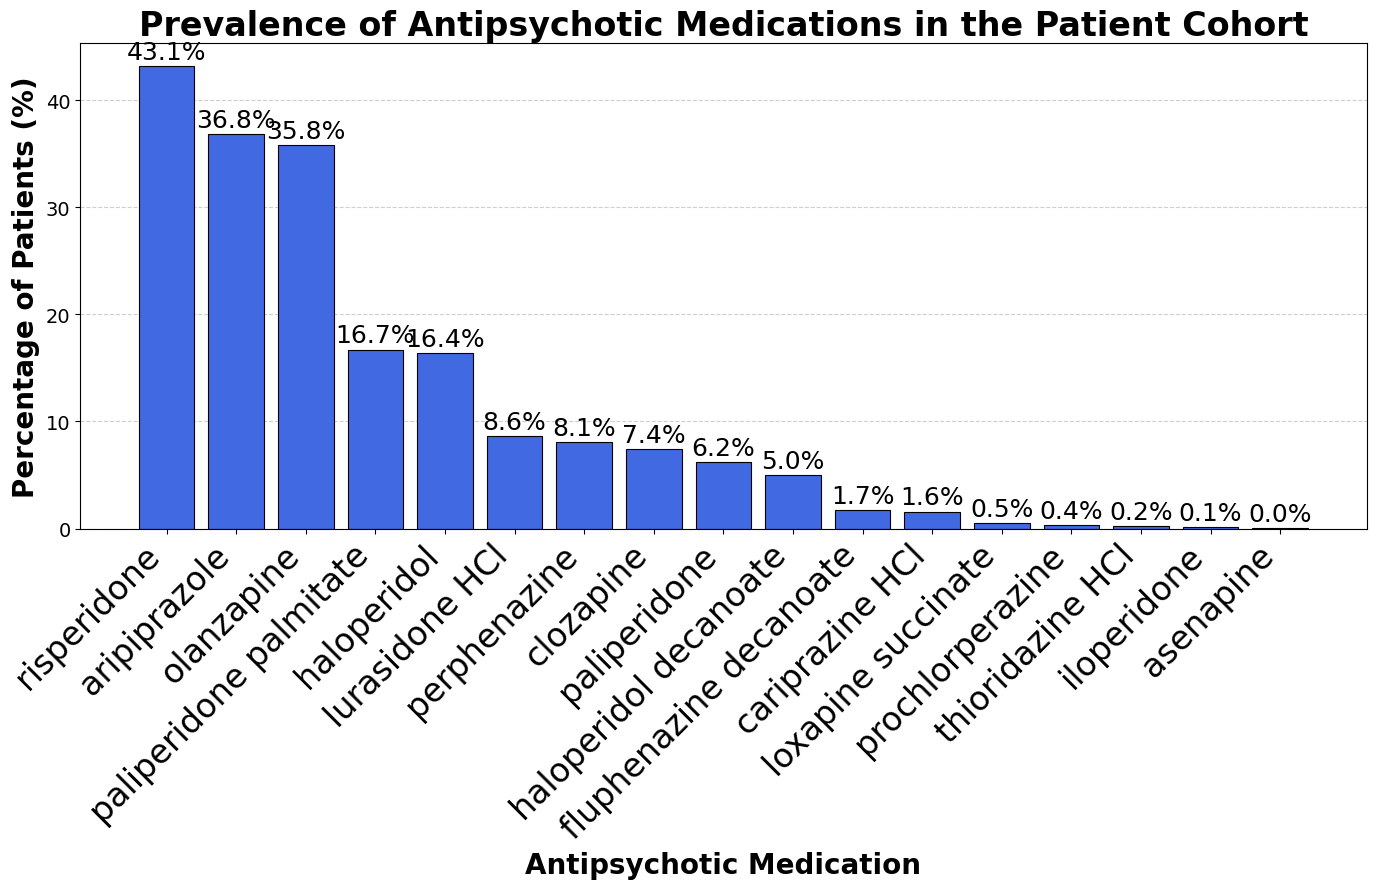

In [338]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_of_drugs_paper_ready(drugs_dict, title, top_n="all", count_patient=False, num_patients=6827):
    """
    Plot a histogram of drug occurrences as percentages with an academic publication-quality style.

    Args:
        drugs_dict (dict): Dictionary of drugs with their counts.
        title (str): Title of the plot.
        top_n (str or int): If "all", include all keys. If a number, include only the top N keys.
        count_patient (bool): Whether to compute percentages based on the number of patients.
        num_patients (int): Total number of patients (for normalization if count_patient=True).
    """
    # Sort drugs by count
    sorted_drugs = sorted(drugs_dict.items(), key=lambda x: x[1], reverse=True)
    
    # Handle top_n logic
    if top_n != "all":
        top_n = min(int(top_n), len(sorted_drugs))  # Ensure it does not exceed the number of available drugs
        sorted_drugs = sorted_drugs[:top_n]

    # Extract names and counts
    drug_names, drug_counts = zip(*sorted_drugs)

    # Calculate percentages
    if count_patient:
        drug_percentages = [(count / num_patients) * 100 for count in drug_counts]
    else:
        total_drugs = sum(drugs_dict.values())
        drug_percentages = [(count / total_drugs) * 100 for count in drug_counts]

    # Plot setup
    fig, ax = plt.subplots(figsize=(14, 9))
    bars = ax.bar(drug_names, drug_percentages, color='royalblue', edgecolor='black', linewidth=0.8)

    # Formatting
    ax.set_xlabel('Antipsychotic Medication', fontsize=20, fontweight='bold')
    ax.set_ylabel('Percentage of Patients (%)', fontsize=20, fontweight='bold')
    ax.set_title(title, fontsize=24, fontweight='bold')

    # Improve readability of x-ticks
    ax.set_xticks(np.arange(len(drug_names)))
    ax.set_xticklabels(drug_names, rotation=45, ha='right', fontsize=24)
    plt.yticks(fontsize=14)

    # Add horizontal grid lines for clarity
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.set_axisbelow(True)  # Ensures grid is behind bars

    # Add value annotations above bars
    for bar, percentage in zip(bars, drug_percentages):
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height() + 0.2,  # Slightly above the bar
                f"{percentage:.1f}%", 
                ha='center', va='bottom', fontsize=18)

    plt.tight_layout()
    plt.savefig('antipsychotic_medication_prevalence.pdf', dpi=300)
    plt.show()

# Example call
# plot_histogram_of_drugs(drugs_per_patient_unique, 'Percentage of Patients Using the Drug', count_patient=True, num_patients=len(people_dict))


plot_histogram_of_drugs_paper_ready(drugs_per_patient_unique, 'Prevalence of Antipsychotic Medications in the Patient Cohort', 
                                    count_patient=True, num_patients=len(people_dict))

In [42]:
# Average non-adherence for each drug

# Initialize the new dictionary with keys from the input dictionary and empty lists as values
unique_drug_non_covered_dict = {drug: [] for drug in all_drugs.keys()}
unique_drug_combination_non_covered_dict = {drug_comb: [] for drug_comb in all_drugs_combinations.keys()}

# Iterate through each row in the dataframe
for index, row in tqdm(data_df.iterrows()):
    # Extract the covered_by list and the non_covered_days value
    covered_by_list = row['covered_by']
    non_covered_days = row['non_covered_days']
    
    # Iterate through the drug names in the input dictionary keys
    for drug in all_drugs.keys():
        # Check if the drug is in the covered_by list
        if drug in covered_by_list:
            # Append the non_covered_days value to the list in the new dictionary
            unique_drug_non_covered_dict[drug].append(non_covered_days)
    
    # Iterate through the drug combinations in the input dictionary keys
    for drug_comb in all_drugs_combinations.keys():
        # Check if the drug combination is a subset of the covered_by list
        if frozenset(covered_by_list) == drug_comb:
            # Append the non_covered_days value to the list in the new dictionary
            unique_drug_combination_non_covered_dict[drug_comb].append(non_covered_days)


unique_drug_combination_non_covered_dict_string = {}
for drug_combination, non_covered_days_for_drug_combination in unique_drug_combination_non_covered_dict.items():
    drug_combination_str = ', '.join(drug_combination)
    if drug_combination_str != '': # Exclude empty drug combinations
        unique_drug_combination_non_covered_dict_string[drug_combination_str] = non_covered_days_for_drug_combination



466405it [00:23, 19543.32it/s]


In [79]:
unique_drug_age_dict = {drug: [] for drug in all_drugs.keys()}
unique_drug_sex_dict = {drug: {key: 0 for key in data_df['legal_sex_common_desc'].unique()} for drug in all_drugs.keys()}
unique_drug_race_dict = {drug: {key: 0 for key in data_df['race_common_desc'].unique()} for drug in all_drugs.keys()}
unique_drug_ethnicity_dict = {drug: {key: 0 for key in data_df['ethnic_common_desc'].unique()} for drug in all_drugs.keys()}
unique_drug_education_dict = {drug: {key: 0 for key in data_df['ed_lvl_common_desc'].unique()} for drug in all_drugs.keys()}

for person in people_dict.values():
    current_drugs_uniq = set()
    current_drugs_comb = set()
    for drugs in person['covered_by']:
        if len(drugs) != 0:
            current_drugs_uniq.update(drugs)
            current_drugs_comb.add(frozenset(drugs))
    
    for drug in all_drugs:
        if drug in current_drugs_uniq:
            unique_drug_age_dict[drug].append(person['age'][0])
            unique_drug_sex_dict[drug][person['legal_sex_common_desc']] = unique_drug_sex_dict[drug].get(person['legal_sex_common_desc'], 0) + 1
            unique_drug_race_dict[drug][person['race_common_desc']] = unique_drug_race_dict[drug].get(person['race_common_desc'], 0) + 1
            unique_drug_ethnicity_dict[drug][person['ethnic_common_desc']] = unique_drug_ethnicity_dict[drug].get(person['ethnic_common_desc'], 0) + 1
            unique_drug_education_dict[drug][person['ed_lvl_common_desc']] = unique_drug_education_dict[drug].get(person['ed_lvl_common_desc'], 0) + 1

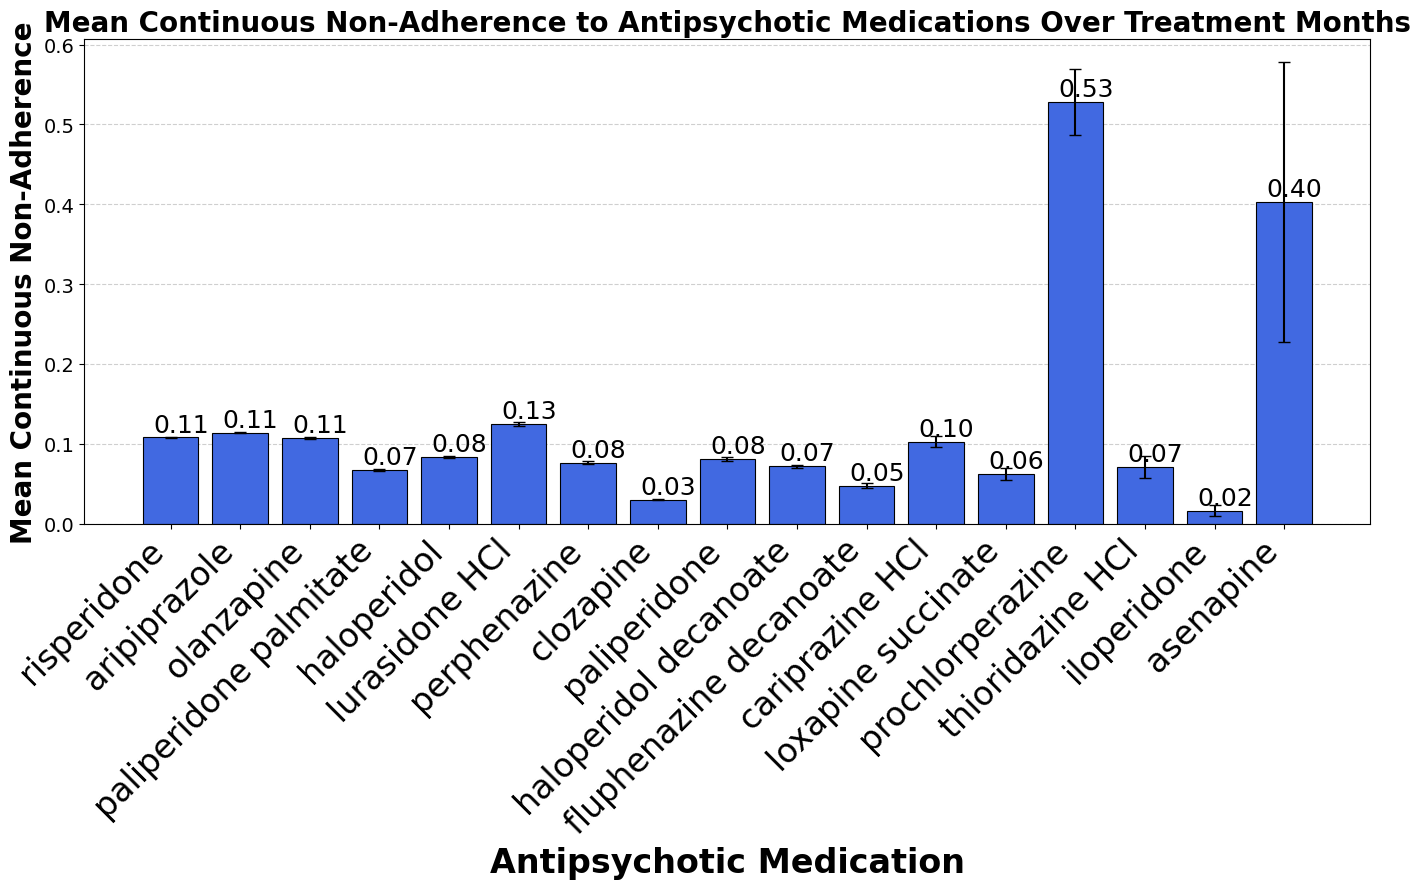

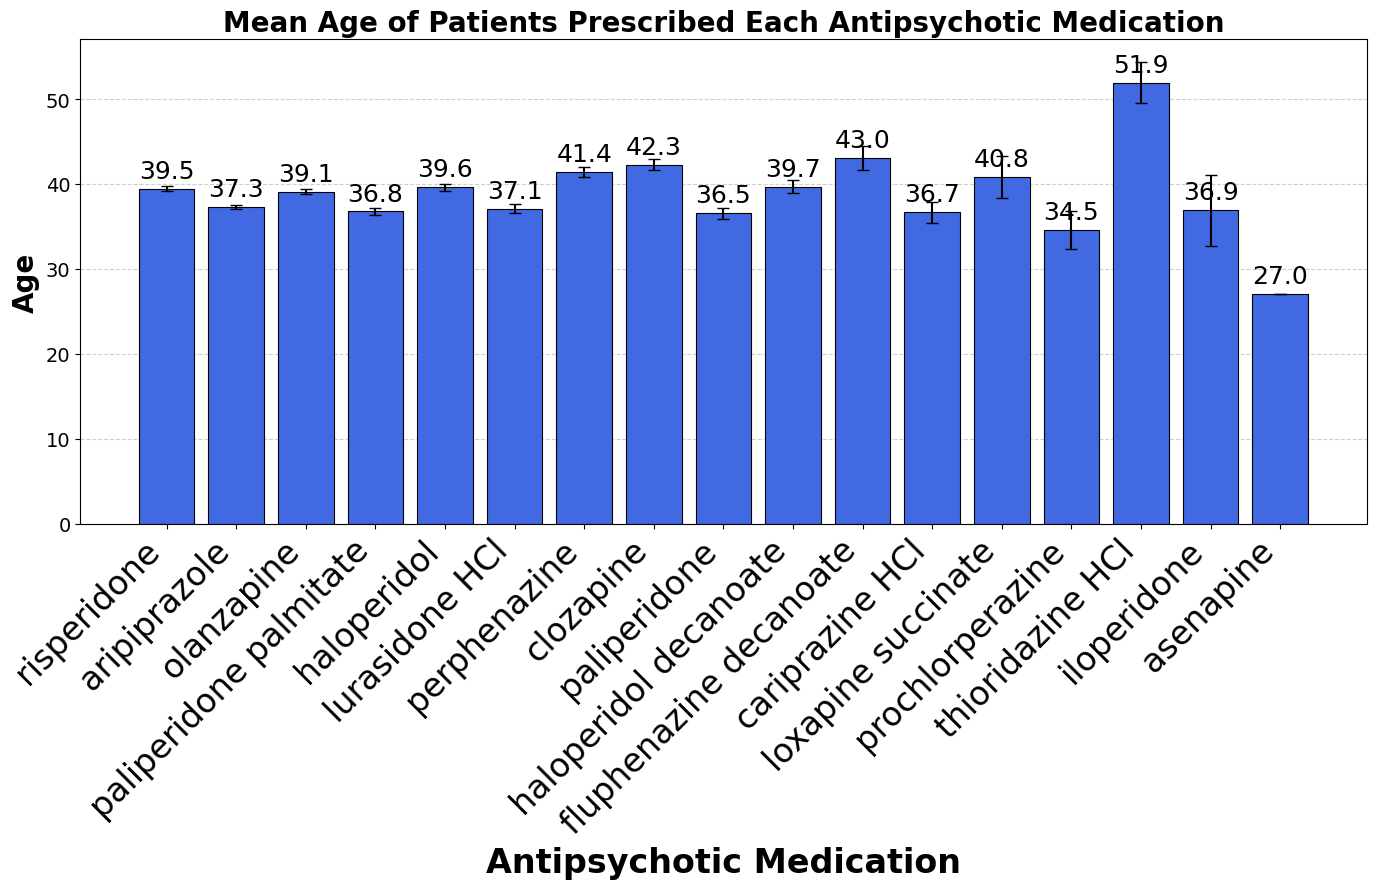

In [337]:
import matplotlib.pyplot as plt
import numpy as np

def plot_drug_non_covered_days_paper_ready(drug_non_covered_dict, drugs_per_patient_unique,
                                           title, y_axis_label='Mean Continuous Non-Adherence', 
                                           top_n="all", order_highest_to_lowest=True):
    """
    Plots the mean and standard error of non-covered days for each drug with a professional academic style.

    Parameters:
        drug_non_covered_dict (dict): A dictionary where keys are drug names and values are lists of non-covered days.
        drugs_per_patient_unique (dict): Dictionary of unique drug occurrences per patient (for sorting).
        title (str): Title for the plot.
        y_axis_label (str): Label for the y-axis.
        top_n (int or str): Number of top drugs to include. Use "all" to include all drugs.
        order_highest_to_lowest (bool): Whether to sort bars from highest to lowest mean.

    Returns:
        None
    """
    # Sort drugs based on patient occurrences
    sorted_drugs_per_patient = sorted(drugs_per_patient_unique.items(), key=lambda x: x[1], reverse=True)
    
    # Extract sorted drug names
    sorted_keys = [x[0] for x in sorted_drugs_per_patient]

    # Filter and order drug_non_covered_dict based on sorted_keys
    sorted_drugs = {k: drug_non_covered_dict[k] for k in sorted_keys if k in drug_non_covered_dict}

    # Extract names and values
    drug_names = list(sorted_drugs.keys())
    drug_values = list(sorted_drugs.values())

    # Compute mean and standard error for each drug
    drug_means = [np.mean(values) for values in drug_values]
    drug_stderr = [np.std(values, ddof=1) / np.sqrt(len(values)) if len(values) > 1 else 0 for values in drug_values]

    # Sort by mean values if specified
    # if order_highest_to_lowest:
    #     sorted_indices = np.argsort(drug_means)[::-1]
    # else:
    #     sorted_indices = np.argsort(drug_means)

    # drug_names = [drug_names[i] for i in sorted_indices]
    # drug_means = [drug_means[i] for i in sorted_indices]
    # drug_stderr = [drug_stderr[i] for i in sorted_indices]

    # Limit to top_n drugs if applicable
    if top_n != "all":
        top_n = min(int(top_n), len(drug_names))
        drug_names = drug_names[:top_n]
        drug_means = drug_means[:top_n]
        drug_stderr = drug_stderr[:top_n]

    # Plot setup
    fig, ax = plt.subplots(figsize=(14, 9))
    bars = ax.bar(drug_names, drug_means, yerr=drug_stderr, capsize=4, color='royalblue', 
                  edgecolor='black', alpha=1, linewidth=0.8)

    # Formatting
    ax.set_xlabel('Antipsychotic Medication', fontsize=24, fontweight='bold')
    ax.set_ylabel(y_axis_label, fontsize=20, fontweight='bold')
    ax.set_title(title, fontsize=20, fontweight='bold')

    # Improve readability of x-ticks
    ax.set_xticks(np.arange(len(drug_names)))
    ax.set_xticklabels(drug_names, rotation=45, ha='right', fontsize=24)
    plt.yticks(fontsize=14)

    # Add horizontal grid lines for clarity
    ax.yaxis.grid(True, linestyle='--', alpha=0.6)
    ax.set_axisbelow(True)  # Ensures grid is behind bars

    # Add value annotations above bars
    for bar, mean in zip(bars, drug_means):
        if "age" in y_axis_label.lower():
            ax.text(bar.get_x() + bar.get_width() / 2 + 0., 
                    bar.get_height() + 0.7,  # Slightly above the bar
                    f"{mean:.1f}", 
                    ha='center', va='bottom', fontsize=18)
        else:
            ax.text(bar.get_x() + bar.get_width() / 2 + 0.15, 
                    bar.get_height() + 0.001,  # Slightly above the bar
                    f"{mean:.2f}", 
                    ha='center', va='bottom', fontsize=18)

    plt.tight_layout()

    if "age" in y_axis_label.lower():
        plt.savefig('mean_age_of_patients_prescribed_each_antipsychotic_medication.pdf', dpi=300)
    else:
        plt.savefig('mean_continuous_non_adherence_for_antipsychotics.pdf', dpi=300)
    plt.show()

plot_drug_non_covered_days_paper_ready(unique_drug_non_covered_dict, drugs_per_patient_unique, 'Mean Continuous Non-Adherence to Antipsychotic Medications Over Treatment Months')
plot_drug_non_covered_days_paper_ready(unique_drug_age_dict, drugs_per_patient_unique, 'Mean Age of Patients Prescribed Each Antipsychotic Medication', 'Age')

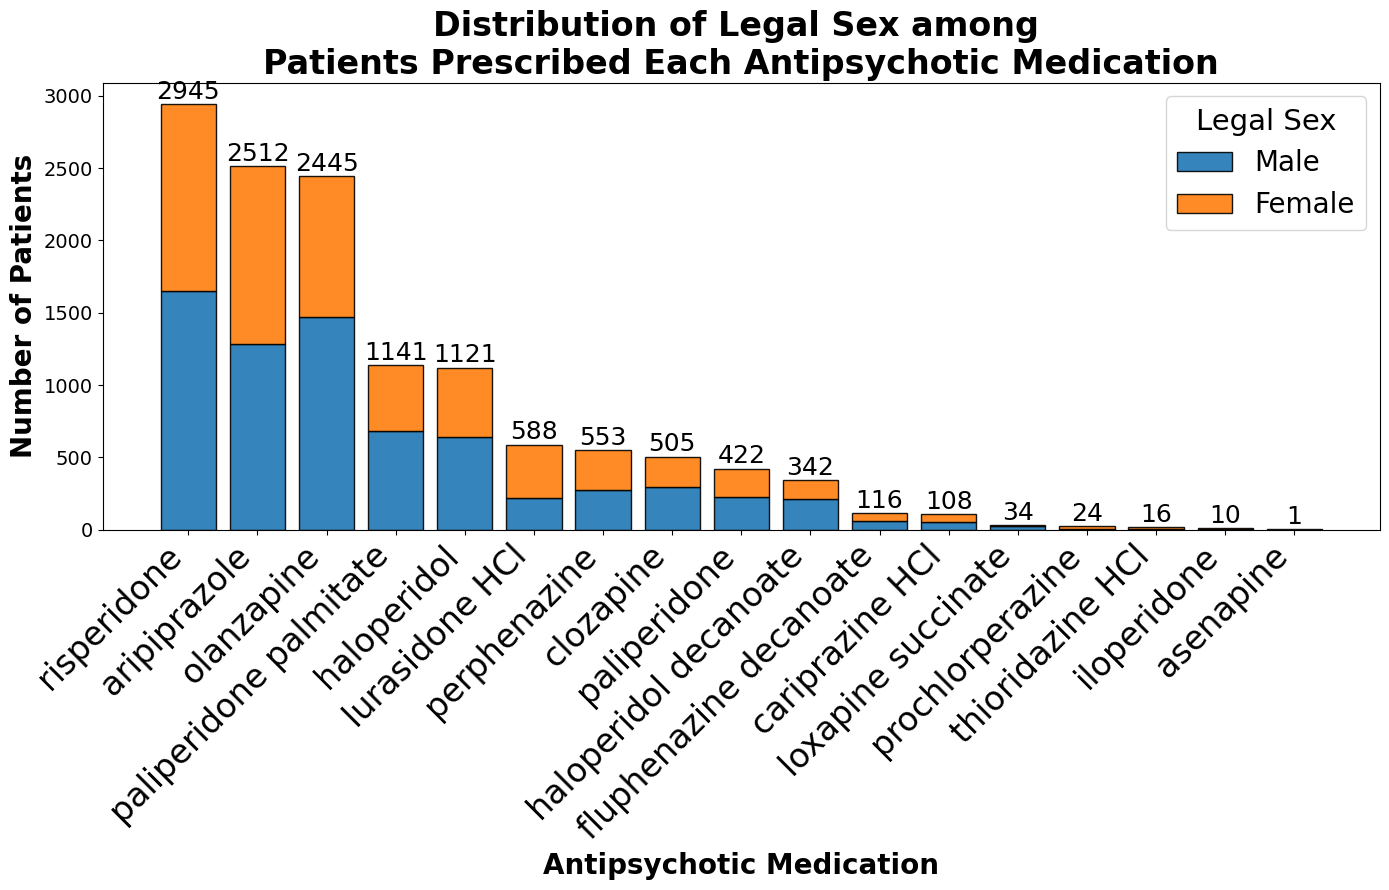

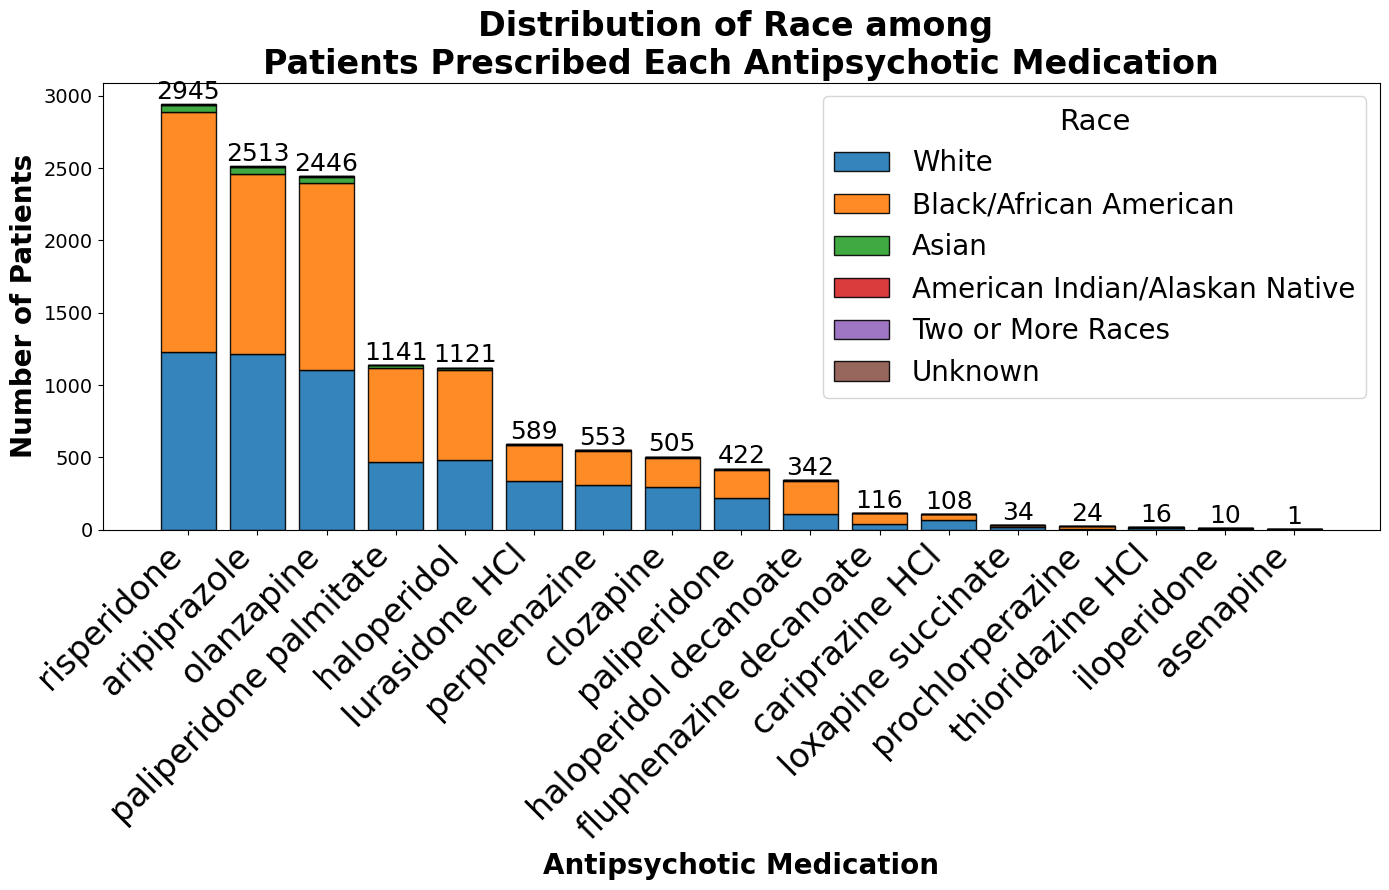

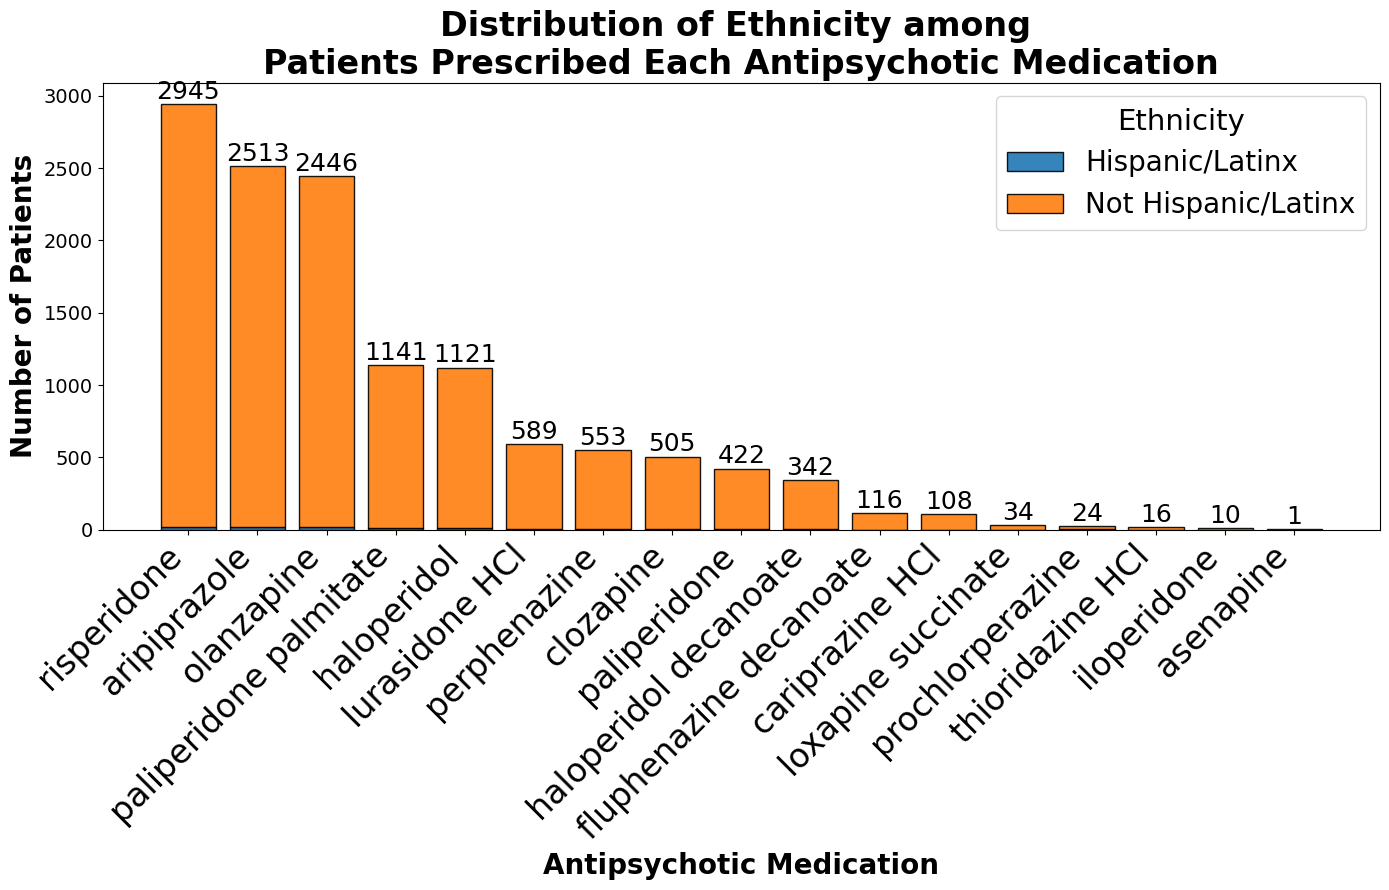

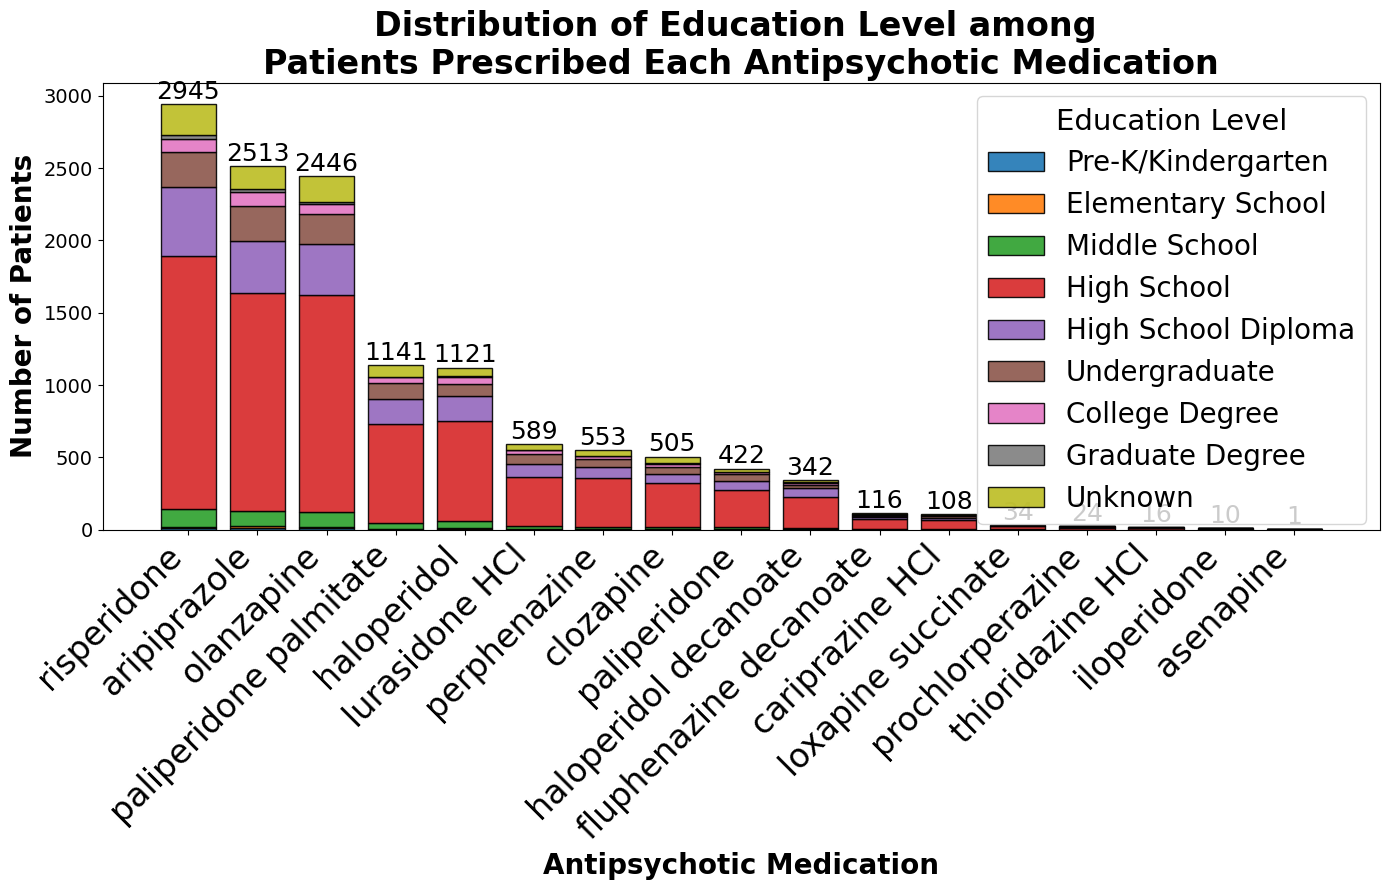

In [335]:
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_bars_paper_ready(data_dict, drugs_per_patient_unique, title, xlabel, ylabel, legend_title):
    """
    Creates a stacked bar plot with publication-ready style.

    Parameters:
        data_dict (dict): Dictionary where keys are drug names and values are dictionaries of categories and counts.
        drugs_per_patient_unique (dict): Dictionary to sort drugs by patient occurrences.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    # Sort drugs by patient occurrences
    sorted_drugs_per_patient = sorted(drugs_per_patient_unique.items(), key=lambda x: x[1], reverse=True)
    drug_names = [x[0] for x in sorted_drugs_per_patient]

    # Extract categories and organize data
    categories = list(next(iter(data_dict.values())).keys())
    categories = [category for category in categories if category != "99~Unknown" ] 

    if legend_title == "Legal Sex":
        categories_dict = {"1~Male":"Male", "2~Female":"Female"}
    elif legend_title == "Race":
        categories_dict = {"1~White":"White", "2~Black/African American": "Black/African American", "4~Asian":"Asian", 
                           "3~American Indian/Alaskan Native":"American Indian/Alaskan Native", "6~Two or More Races":"Two or More Races",
                           "99~Unknown":"Unknown"}
    elif legend_title == "Ethnicity":
        categories_dict = {"1~Hispanic/Latinx":"Hispanic/Latinx", "2~Not Hispanic/Latinx":"Not Hispanic/Latinx"}
    elif legend_title == "Education Level":
        categories_dict = {
                            'PK-K~Kindergarten / Pre-K': "Pre-K/Kindergarten",
                            '1-5~Elementary School (Grade 1-5)': 'Elementary School',
                            '6-8~Middle School (Grade 6-8)': "Middle School", 
                            '9-12~High School (grade 9-12)': 'High School', 
                            'GED~High School Diploma/GED Completed': "High School Diploma", 
                            'UNDERGRAD~Some College': "Undergraduate", 
                            'GRAD COMP~College Degree': 'College Degree', 
                            'GRAD~Graduate Degree': "Graduate Degree", 
                            '99~Unknown':"Unknown"
                            }

    data = {category: [] for _, category in categories_dict.items()}
    for drug in drug_names:
        for category_name, category in categories_dict.items():
            # if category == "99~Unknown":
                # continue
            data[category].append(data_dict[drug].get(category_name, 0))

    # Prepare x-axis positions
    x = np.arange(len(drug_names))
    bar_width = 0.8
    bottom_values = np.zeros(len(drug_names))  # Initialize bottoms for stacking

    plt.figure(figsize=(14, 9))

    # Create stacked bars
    for category, counts in data.items():
        plt.bar(x, counts, bottom=bottom_values, label=category, width=bar_width, alpha=0.9, edgecolor="black")
        bottom_values += counts

    # Add total count annotations above bars
    for i, total in enumerate(bottom_values):
        plt.text(
            x[i], total + 0.5,  # Slightly above the bar
            f"{int(total)}",  # Total count
            ha='center', va='bottom', fontsize=18
        )

    # Customize plot aesthetics
    plt.xticks(x, drug_names, rotation=45, ha='right', fontsize=24) #, fontweight='bold')
    plt.yticks(fontsize=14)
    plt.xlabel(xlabel, fontsize=20, fontweight='bold')
    plt.ylabel(ylabel, fontsize=20, fontweight='bold')
    plt.title(title, fontsize=24, fontweight='bold')

    # Add legend with professional placement
    plt.legend(title=legend_title, title_fontsize=21, fontsize=20, loc="upper right") #, bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

    if legend_title == "Legal Sex":
        plt.savefig('distribution_of_legal_sex_among_patients_prescribed_each_antipsychotic_medication.pdf', dpi=300)
    elif legend_title == "Race":
        plt.savefig('distribution_of_race_among_patients_prescribed_each_antipsychotic_medication.pdf', dpi=300)
    elif legend_title == "Ethnicity":
        plt.savefig('distribution_of_ethnicity_among_patients_prescribed_each_antipsychotic_medication.pdf', dpi=300)
    elif legend_title == "Education Level":
        plt.savefig('distribution_of_education_level_among_patients_prescribed_each_antipsychotic_medication.pdf', dpi=300)

    plt.show()


# Example usage
plot_combined_bars_paper_ready(
    unique_drug_sex_dict, drugs_per_patient_unique,
    title="Distribution of Legal Sex among \nPatients Prescribed Each Antipsychotic Medication",
    xlabel="Antipsychotic Medication",
    ylabel="Number of Patients",
    legend_title="Legal Sex"
)

plot_combined_bars_paper_ready(
    unique_drug_race_dict, drugs_per_patient_unique,
    title="Distribution of Race among \nPatients Prescribed Each Antipsychotic Medication",
    xlabel="Antipsychotic Medication",
    ylabel="Number of Patients",
    legend_title="Race"
)

plot_combined_bars_paper_ready(
    unique_drug_ethnicity_dict, drugs_per_patient_unique,
    title="Distribution of Ethnicity among \nPatients Prescribed Each Antipsychotic Medication",
    xlabel="Antipsychotic Medication",
    ylabel="Number of Patients",
    legend_title="Ethnicity"
)

plot_combined_bars_paper_ready(
    unique_drug_education_dict, drugs_per_patient_unique,
    title="Distribution of Education Level among \nPatients Prescribed Each Antipsychotic Medication",
    xlabel="Antipsychotic Medication",
    ylabel="Number of Patients",
    legend_title="Education Level"
)


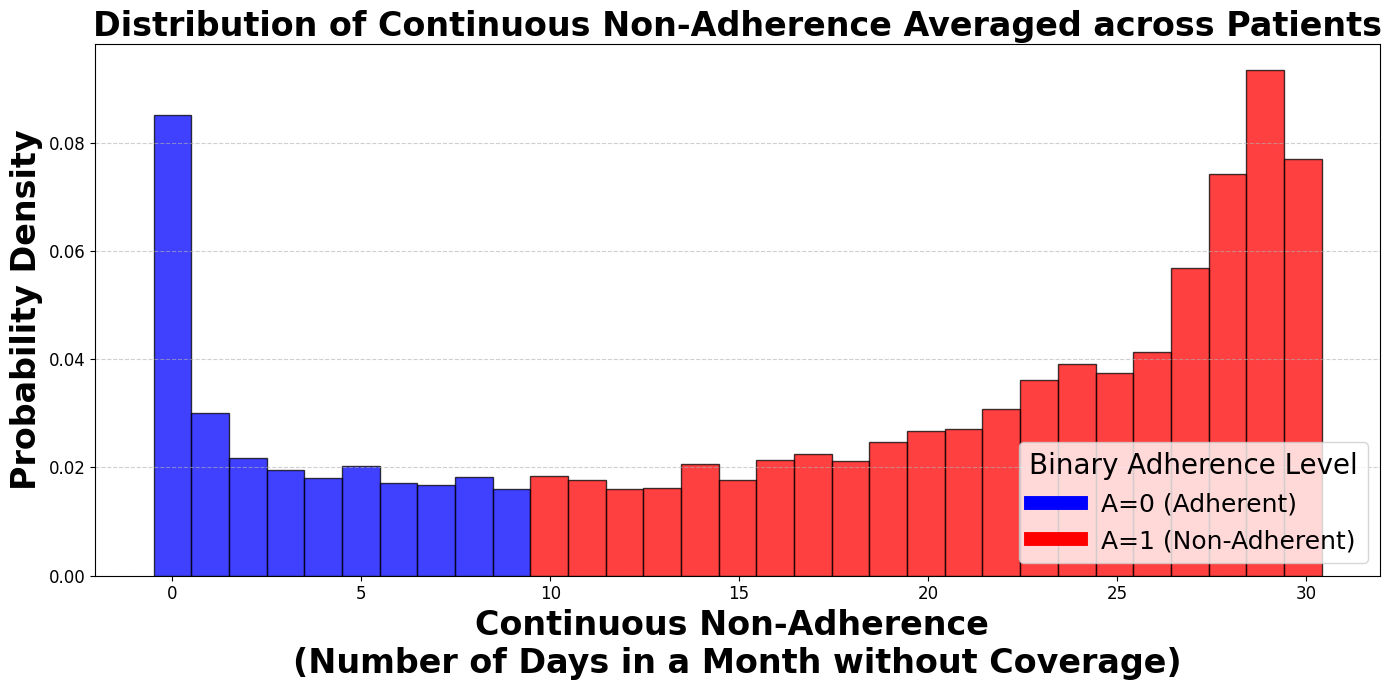

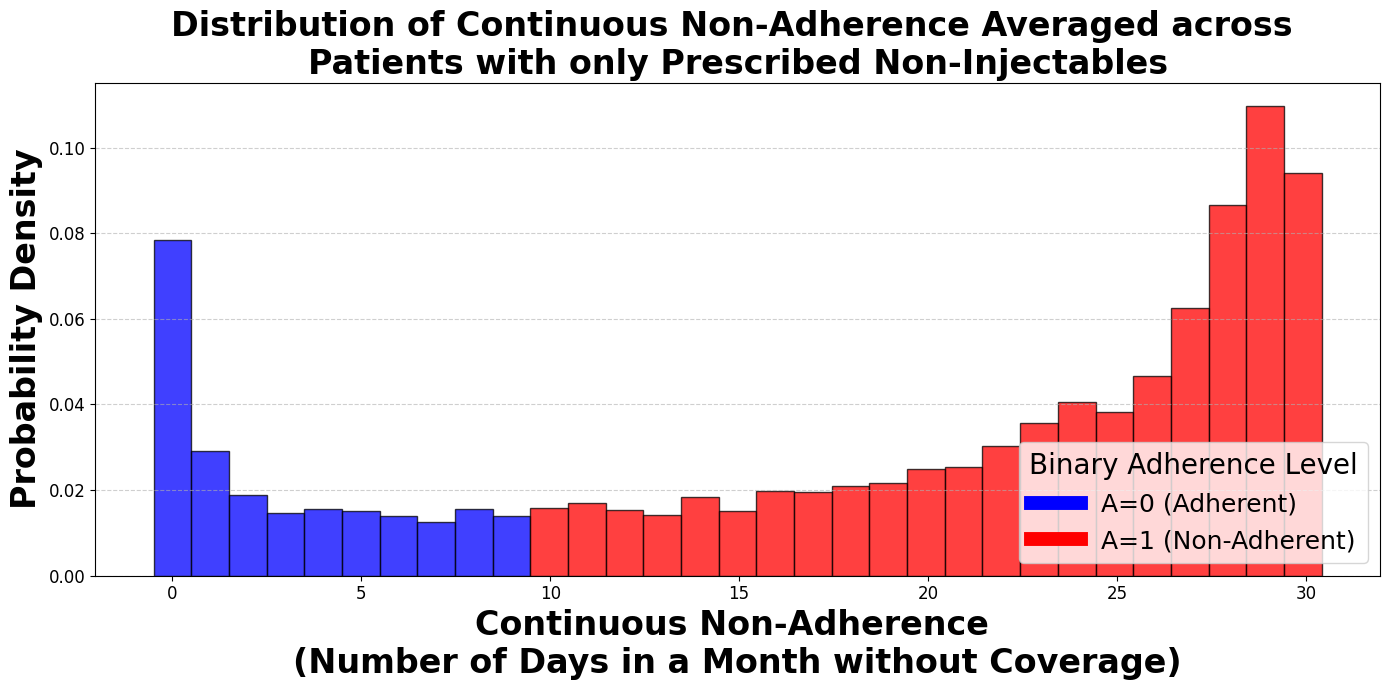

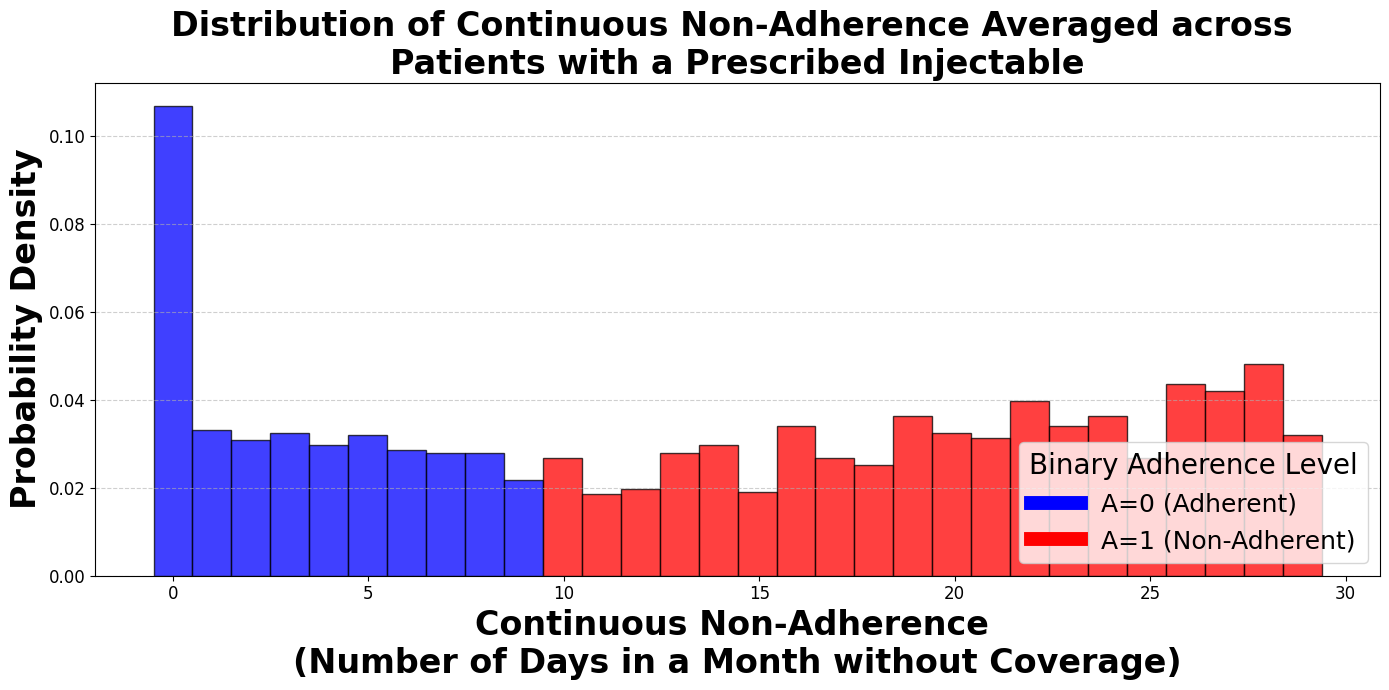

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distribution_non_covered_paper_ready_colored(data, title, xlabel, ylabel, bins=30, mode="all"):
    """
    Creates a paper-ready distribution plot with a histogram and KDE, 
    coloring bars based on position (leftmost vs rightmost) and adding a legend.

    Parameters:
        data (list or array): Data to be plotted.
        title (str): Title for the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        bins (int): Number of bins for the histogram.

    Returns:
        None
    """
    plt.figure(figsize=(14, 7))
    
    # Compute the histogram data
    counts, bin_edges = np.histogram(data, bins=bins)
    counts = counts/sum(counts)  # Normalize counts to sum to 1
    
    # Define the bar colors
    bar_colors = ['blue'] * 10 + ['red'] * (len(counts) - 10)

    # Plot the histogram
    for i in range(len(counts)):
        plt.bar(bin_edges[i] * bins, counts[i], width=(bin_edges[i + 1] - bin_edges[i]) * bins,
                color=bar_colors[i], edgecolor='black', alpha=0.75)

    # Add KDE line
    # sns.kdeplot(data, color='black', linewidth=2)

    # Add legend
    handles = [
        plt.Line2D([0], [0], color='blue', lw=10, label='A=0 (Adherent)'),
        plt.Line2D([0], [0], color='red', lw=10, label='A=1 (Non-Adherent)')
    ]
    plt.legend(handles=handles, title="Binary Adherence Level", fontsize=18, title_fontsize=20, loc='lower right')

    # Customize axis labels and title
    plt.xlabel(xlabel, fontsize=24, fontweight='bold')
    plt.ylabel(ylabel, fontsize=24, fontweight='bold')
    plt.title(title, fontsize=24, fontweight='bold')
    
    # Add subtle grid lines
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Customize tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()

    if mode == "all":
        plt.savefig('distribution_of_continuous_non-adherence_for_all_patients.pdf', dpi=300)
    elif mode == "injectable":
        plt.savefig('distribution_of_continuous_non_adherence_for_patients_with_injectables.pdf', dpi=300)
    elif mode == "non-injectable":
        plt.savefig('distribution_of_continuous_non_adherence_for_patients_with_non-injectables.pdf', dpi=300)
    plt.show()


count_patients_with_injectable = 0
list_average_non_covered_with_injectable = []
list_average_non_covered_with_oral = []
is_person_always_injectable = []
average_person_injectable = []
average_non_covered_across_patients = []

for person in tqdm(people_dict.values()):
    if person['covered_by_injectable'].any(): # if the patient every used injectible
        count_patients_with_injectable += 1
        list_average_non_covered_with_injectable.append(person['non_covered_days'][:person['death_time']+1].mean())

        current_person_injectable_list = person['covered_by_injectable'][:person['death_time']+1][person['non_covered_days'][:person['death_time']+1] < 1]
        is_person_always_injectable.append(1 if current_person_injectable_list.all() else 0)
        average_person_injectable.append(current_person_injectable_list.mean())

    else: # if the patient never used injectable
        list_average_non_covered_with_oral.append(person['non_covered_days'][:person['death_time']+1].mean())

    average_non_covered_across_patients.append(person['non_covered_days'][:person['death_time']+1].mean())

# Example usage
plot_distribution_non_covered_paper_ready_colored(
    average_non_covered_across_patients, 
    title="Distribution of Continuous Non-Adherence Averaged across Patients",
    xlabel="Continuous Non-Adherence \n(Number of Days in a Month without Coverage)",
    ylabel="Probability Density",
    bins=31,
    mode='all'
)


plot_distribution_non_covered_paper_ready_colored(
    list_average_non_covered_with_oral, 
    title="Distribution of Continuous Non-Adherence Averaged across \nPatients with only Prescribed Non-Injectables",
    xlabel="Continuous Non-Adherence \n(Number of Days in a Month without Coverage)",
    ylabel="Probability Density",
    bins=31,
    mode='non-injectable'
)


plot_distribution_non_covered_paper_ready_colored(
    list_average_non_covered_with_injectable, 
    title="Distribution of Continuous Non-Adherence Averaged across \nPatients with a Prescribed Injectable",
    xlabel="Continuous Non-Adherence \n(Number of Days in a Month without Coverage)",
    ylabel="Probability Density",
    bins=30,
    mode='injectable'
)


### Scores

In [157]:
predicted_302_score, predicted_jail_score, predicted_death_score = [], [], []
actual_302_event, actual_jail_event, actual_death_event = [], [], []
count_302_non_enough_data, count_jail_non_enough_data, count_death_non_enough_data = 0, 0, 0

for person in tqdm(people_dict.values()):
    event_302_in_12_mo = np.array([1 if np.any(person['ind_302'][i:i+12]) else 0 for i in range(person['death_time']+1)])
    event_302_in_12_mo = event_302_in_12_mo[: (np.append(np.where(event_302_in_12_mo[-11:]==0), (11)) + (len(event_302_in_12_mo)-11))[0]]  # rem last 11mo if no event

    event_jail_in_12_mo = np.array([1 if np.any(person['ind_jail'][i:i+12]) else 0 for i in range(person['death_time']+1)])
    event_jail_in_12_mo = event_jail_in_12_mo[: (np.append(np.where(event_jail_in_12_mo[-11:]==0), (11)) + (len(event_jail_in_12_mo)-11))[0]]  # rem last 11mo if no event

    event_death_in_12_mo = np.array([1 if np.any(person['ind_death'][i:i+12]) else 0 for i in range(person['death_time']+1)])
    event_death_in_12_mo = event_death_in_12_mo[: (np.append(np.where(event_death_in_12_mo[-11:]==0), (11)) + (len(event_death_in_12_mo)-11))[0]]  # rem last 11mo if no event

    if len(event_302_in_12_mo) > 0:
        predicted_302_score.append(person['predicted_PRO_302_12MO'][:len(event_302_in_12_mo)])
        actual_302_event.append(event_302_in_12_mo)
    else:
        count_302_non_enough_data += 1
    
    if len(event_jail_in_12_mo) > 0:
        predicted_jail_score.append(person['predicted_PRO_JAILSTAY_12MO'][:len(event_jail_in_12_mo)])      
        actual_jail_event.append(event_jail_in_12_mo)
    else:
        count_jail_non_enough_data += 1

    if len(event_death_in_12_mo) > 0:
        predicted_death_score.append(person['predicted_PRO_MORTALITY_12MO'][:len(event_death_in_12_mo)])
        actual_death_event.append(event_death_in_12_mo)
    else:
        count_death_non_enough_data += 1


print(f"302: {count_302_non_enough_data}, Jail: {count_jail_non_enough_data}, Death: {count_death_non_enough_data}")

100%|██████████| 6827/6827 [00:05<00:00, 1352.50it/s]

302: 186, Jail: 190, Death: 145


In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

def evaluate_predictions(true, predicted, threshold=0.5, title=""):
    """
    Evaluate the performance of binary predictions.
    
    Args:
        true (array-like): Binary true labels (0 or 1).
        predicted (array-like): Predicted probabilities (0 to 1).
    """
    # Binarize predicted probabilities using a threshold of threshold
    predicted_binary = (predicted >= threshold).astype(int)

    # Calculate performance metrics
    acc = accuracy_score(true, predicted_binary)
    precision = precision_score(true, predicted_binary)
    recall = recall_score(true, predicted_binary)
    f1_binary = f1_score(true, predicted_binary, average="binary")
    f1_macro = f1_score(true, predicted_binary, average="macro")
    auc = roc_auc_score(true, predicted)
    brier_score = brier_score_loss(true, predicted)
    
    print("Performance Metrics:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score (Binary): {f1_binary:.3f}")
    print(f"F1 Score (Macro): {f1_macro:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Brier Score: {brier_score:.3f}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true, predicted)

    # Calculate calibration curve
    prob_true, prob_pred = calibration_curve(true, predicted, n_bins=10)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    if title:
        fig.suptitle(title)

    # Plot ROC curve
    axes[0].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
    axes[0].plot([0, 1], [0, 1], "k--", label="Random Classifier")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve")
    axes[0].legend()
    axes[0].grid(True)

    # Plot calibration curve
    axes[1].plot(prob_pred, prob_true, "s-", label="Calibration Curve")
    axes[1].plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
    axes[1].set_xlabel("Mean Predicted Probability")
    axes[1].set_ylabel("Fraction of Positives")
    axes[1].set_title("Calibration Plot")
    axes[1].legend()
    axes[1].grid(True)

    # Show the plots
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
)
from sklearn.calibration import calibration_curve

def evaluate_predictions(true, predicted, threshold=0.5, title=""):
    """
    Evaluate the performance of binary predictions.
    
    Args:
        true (array-like): Binary true labels (0 or 1).
        predicted (array-like): Predicted probabilities (0 to 1).
    """
    # Binarize predicted probabilities using a threshold of threshold
    predicted_binary = (predicted >= threshold).astype(int)

    # Calculate performance metrics
    acc = accuracy_score(true, predicted_binary)
    precision = precision_score(true, predicted_binary)
    recall = recall_score(true, predicted_binary)
    f1_binary = f1_score(true, predicted_binary, average="binary")
    f1_macro = f1_score(true, predicted_binary, average="macro")
    auc = roc_auc_score(true, predicted)
    brier_score = brier_score_loss(true, predicted)
    
    print("Performance Metrics:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score (Binary): {f1_binary:.3f}")
    print(f"F1 Score (Macro): {f1_macro:.3f}")
    print(f"AUC: {auc:.3f}")
    print(f"Brier Score: {brier_score:.3f}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true, predicted)

    # Calculate calibration curve
    prob_true, prob_pred = calibration_curve(true, predicted, n_bins=10)

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    if title:
        fig.suptitle(title)

    # Plot ROC curve
    axes[0].plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
    axes[0].plot([0, 1], [0, 1], "k--", label="Random Classifier")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("ROC Curve")
    axes[0].legend()
    axes[0].grid(True)

    # Plot calibration curve
    axes[1].plot(prob_pred, prob_true, "s-", label="Calibration Curve")
    axes[1].plot([0, 1], [0, 1], "k--", label="Perfect Calibration")
    axes[1].set_xlabel("Mean Predicted Probability")
    axes[1].set_ylabel("Fraction of Positives")
    axes[1].set_title("Calibration Plot")
    axes[1].legend()
    axes[1].grid(True)

    # Show the plots
    plt.show()


Involuntary Hospitalization Risk Predictors
Accuracy: 0.813
Precision: 0.303
Recall: 0.494
F1 Score (Binary): 0.376
F1 Score (Macro): 0.633
AUC: 0.748
Brier Score: 0.092


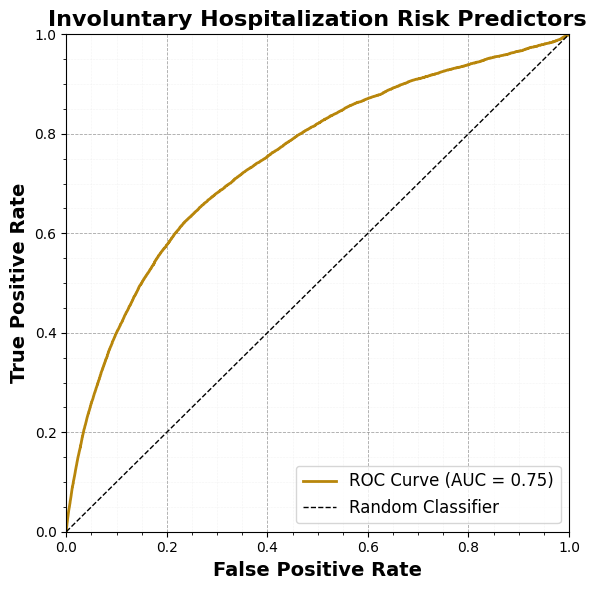


Jail Risk Predictors
Accuracy: 0.891
Precision: 0.401
Recall: 0.570
F1 Score (Binary): 0.471
F1 Score (Macro): 0.705
AUC: 0.882
Brier Score: 0.062


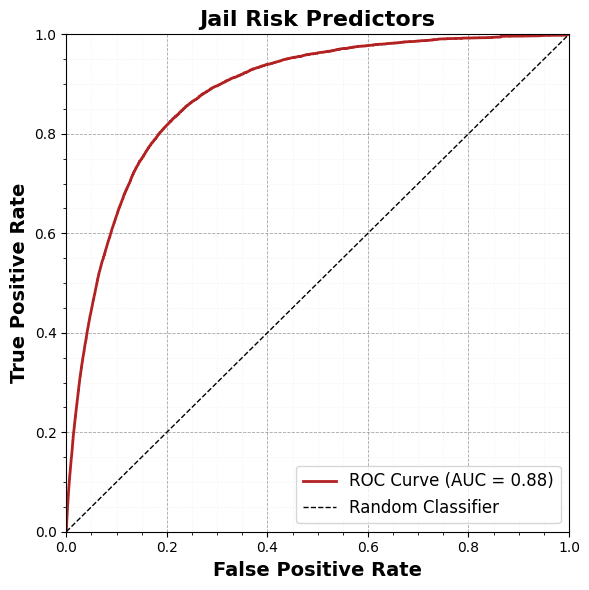


Death Risk Predictors
Accuracy: 0.925
Precision: 0.097
Recall: 0.251
F1 Score (Binary): 0.140
F1 Score (Macro): 0.550
AUC: 0.742
Brier Score: 0.023


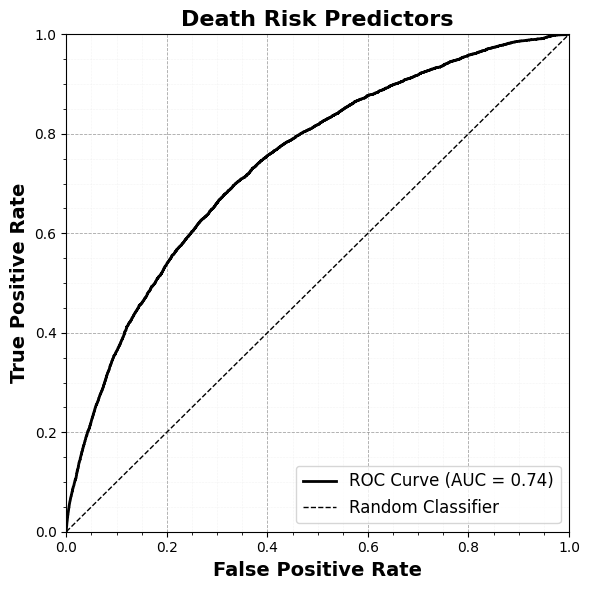

In [250]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    brier_score_loss,
)

def evaluate_predictions_paper_ready(true, predicted, threshold=0.5, title="", color="black"):
    """
    Evaluate the performance of binary predictions with a paper-ready plot and metrics output.

    Args:
        true (array-like): Binary true labels (0 or 1).
        predicted (array-like): Predicted probabilities (0 to 1).
        threshold (float): Threshold for converting predicted probabilities to binary predictions.
        title (str): Title for the plot.
        color (str): Line color for the ROC curve.

    Returns:
        None
    """
    # Binarize predicted probabilities using the threshold
    predicted_binary = (predicted >= threshold).astype(int)

    # Calculate performance metrics
    metrics = {
        "Accuracy": accuracy_score(true, predicted_binary),
        "Precision": precision_score(true, predicted_binary),
        "Recall": recall_score(true, predicted_binary),
        "F1 Score (Binary)": f1_score(true, predicted_binary, average="binary"),
        "F1 Score (Macro)": f1_score(true, predicted_binary, average="macro"),
        "AUC": roc_auc_score(true, predicted),
        "Brier Score": brier_score_loss(true, predicted),
    }

    # Print metrics in a clean format
    print(f"\n{'='*80}\n{title}\n{'='*80}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(true, predicted)

    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {metrics['AUC']:.2f})", color=color, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier", linewidth=1)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold")
    plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold")
    plt.title(f"{title}", fontsize=16, fontweight="bold")
    plt.legend(loc="lower right", fontsize=12)

    # Improved grid styling
    plt.grid(
        which="major", axis="both", linestyle="--", linewidth=0.6, alpha=0.7, color="gray"
    )
    plt.grid(
        which="minor", axis="both", linestyle=":", linewidth=0.4, alpha=0.5, color="lightgray"
    )
    plt.minorticks_on()  # Add minor ticks for finer detail

    # Add a tight layout
    plt.tight_layout()
    if "involuntary" in title.lower():
        plt.savefig('roc_curve_involuntary_hospitalization_risk.pdf', dpi=300)
    elif "jail" in title.lower():
        plt.savefig('roc_curve_jail_risk.pdf', dpi=300)
    elif "death" in title.lower():
        plt.savefig('roc_curve_death_risk.pdf', dpi=300)

    plt.show()

# Example usage for evaluations
evaluate_predictions_paper_ready(
    np.concatenate(actual_302_event), np.concatenate(predicted_302_score),
    threshold=0.12, title="Involuntary Hospitalization Risk Predictors", color="darkgoldenrod"
)

evaluate_predictions_paper_ready(
    np.concatenate(actual_jail_event), np.concatenate(predicted_jail_score),
    threshold=0.2, title="Jail Risk Predictors", color="firebrick"
)

evaluate_predictions_paper_ready(
    np.concatenate(actual_death_event), np.concatenate(predicted_death_score),
    threshold=0.07, title="Death Risk Predictors", color="black"
)

# Unique Static Covariate Combinations

In [172]:
from collections import defaultdict

# Print unique values of 'race_common_desc' for clarity
print(data_df['race_common_desc'].unique())

# Initialize defaultdict for each category
race_lst_dict = defaultdict(int)
ethnicity_lst_dict = defaultdict(int)
education_lst_dict = defaultdict(int)
sex_lst_dict = defaultdict(int)

# Iterate through people_dict to populate the dictionaries
for person in people_dict.values():
    race_lst_dict[person['race_common_desc']] += 1
    ethnicity_lst_dict[person['ethnic_common_desc']] += 1
    education_lst_dict[person['ed_lvl_common_desc']] += 1
    sex_lst_dict[person['legal_sex_common_desc']] += 1

# Optionally, convert defaultdict to dict if you prefer
race_lst_dict = dict(race_lst_dict)
ethnicity_lst_dict = dict(ethnicity_lst_dict)
education_lst_dict = dict(education_lst_dict)
sex_lst_dict = dict(sex_lst_dict)

['2~Black/African American' '1~White' '4~Asian'
 '3~American Indian/Alaskan Native' '99~Unknown' '6~Two or More Races']


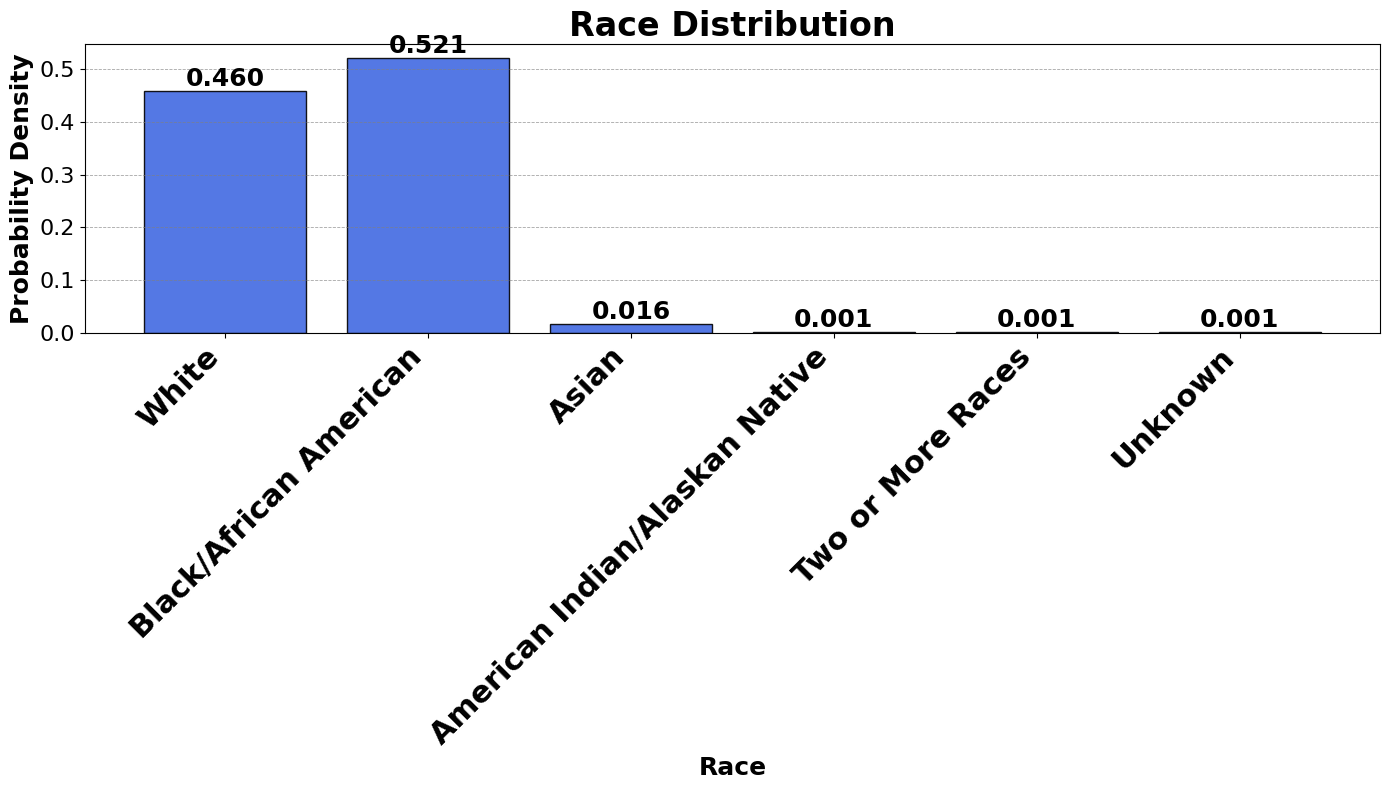

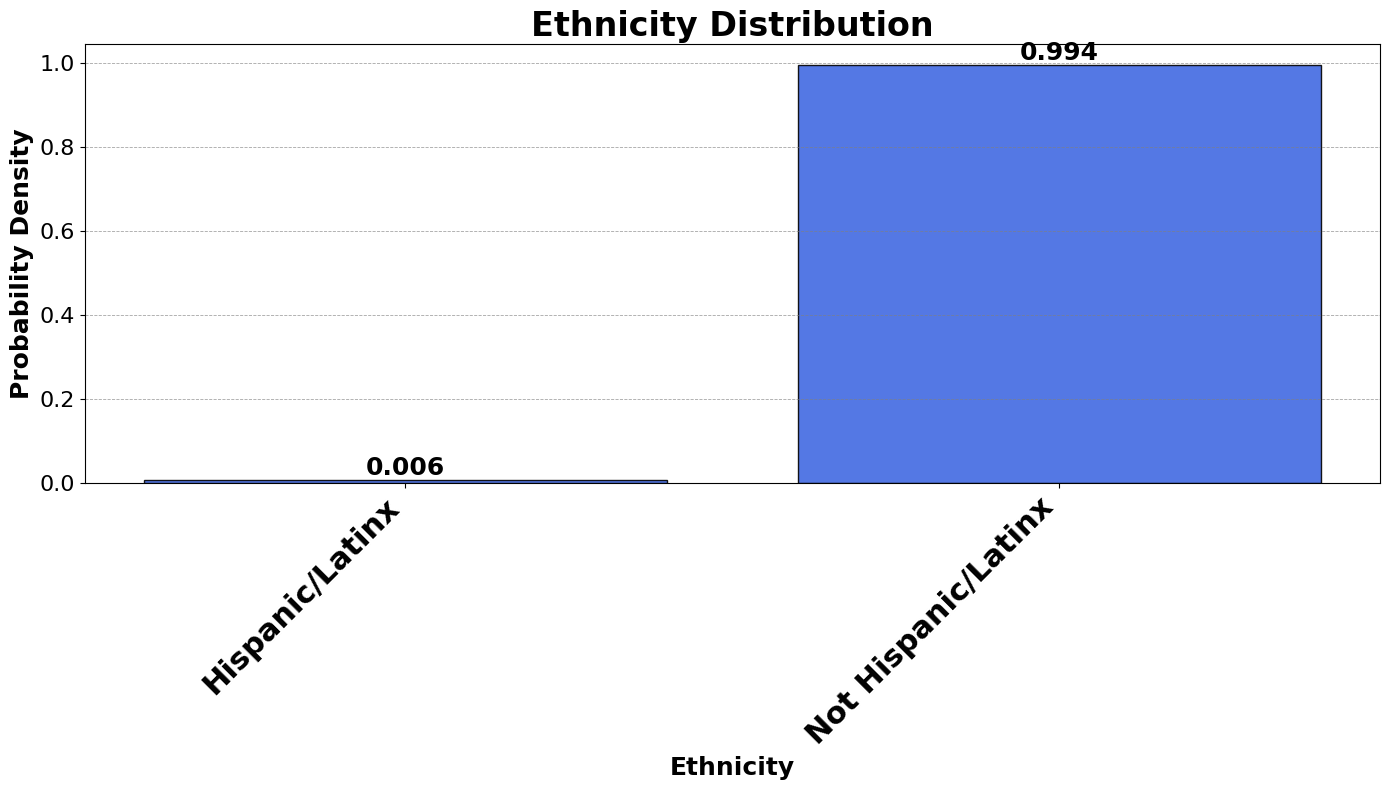

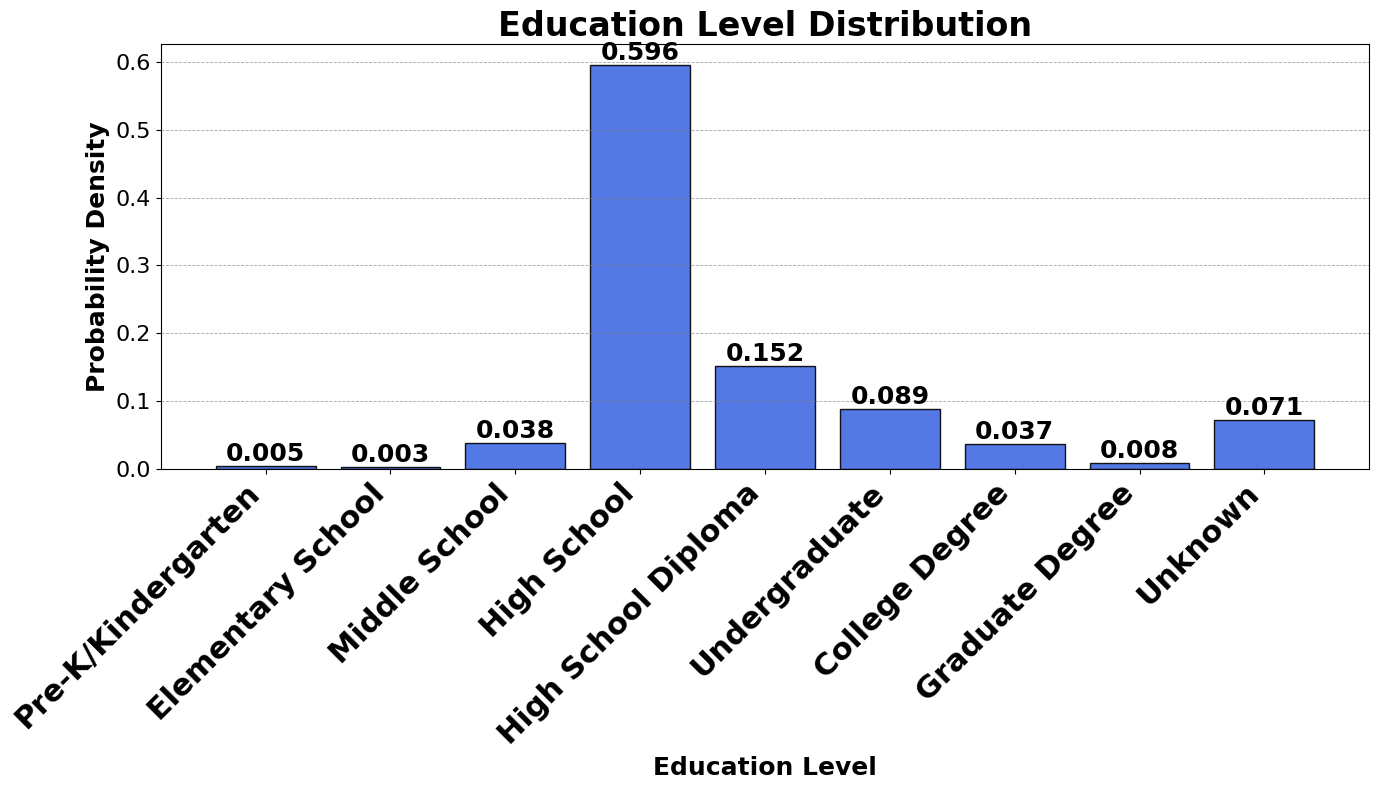

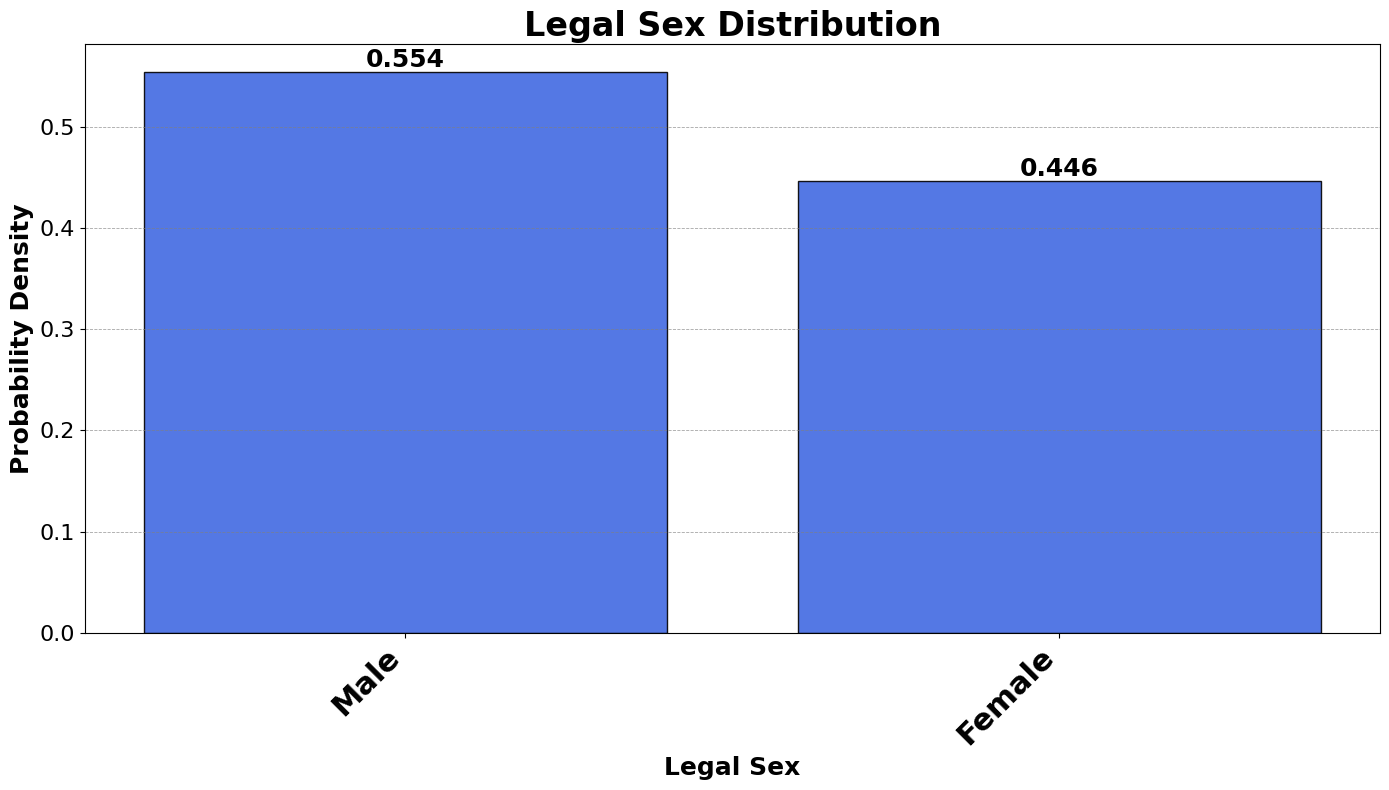

In [308]:
import matplotlib.pyplot as plt

def plot_histogram_with_counts_paper_ready(data_dict, title, xlabel):
    """
    Creates a paper-ready histogram with counts displayed on top of each bar.

    Parameters:
        data_dict (dict): Dictionary of category names and corresponding counts.
        title (str): Title of the histogram.
        xlabel (str): Label for the x-axis.

    Returns:
        None
    """
    # Define category mappings
    if xlabel == "Legal Sex":
        categories_dict = {"1~Male": "Male", "2~Female": "Female"}
    elif xlabel == "Race":
        categories_dict = {
            "1~White": "White",
            "2~Black/African American": "Black/African American",
            "4~Asian": "Asian",
            "3~American Indian/Alaskan Native": "American Indian/Alaskan Native",
            "6~Two or More Races": "Two or More Races",
            "99~Unknown": "Unknown",
        }
    elif xlabel == "Ethnicity":
        categories_dict = {
            "1~Hispanic/Latinx": "Hispanic/Latinx",
            "2~Not Hispanic/Latinx": "Not Hispanic/Latinx",
        }
    elif xlabel == "Education Level":
        categories_dict = {
            "PK-K~Kindergarten / Pre-K": "Pre-K/Kindergarten",
            "1-5~Elementary School (Grade 1-5)": "Elementary School",
            "6-8~Middle School (Grade 6-8)": "Middle School",
            "9-12~High School (grade 9-12)": "High School",
            "GED~High School Diploma/GED Completed": "High School Diploma",
            "UNDERGRAD~Some College": "Undergraduate",
            "GRAD COMP~College Degree": "College Degree",
            "GRAD~Graduate Degree": "Graduate Degree",
            "99~Unknown": "Unknown",
        }

    # Normalize data to probability density
    total_count = sum(data_dict.values())  # Assuming a total count for normalization
    normalized_data = {
        categories_dict[category_name]: data_dict[category_name] / total_count
        for category_name in categories_dict
        if category_name in data_dict
    }

    # Create the plot
    plt.figure(figsize=(14, 8))
    bars = plt.bar(normalized_data.keys(), normalized_data.values(), color="royalblue", edgecolor="black", alpha=0.9)

    # Add title and axis labels with professional styling
    plt.title(title, fontsize=24, fontweight="bold")
    plt.xlabel(xlabel, fontsize=18, fontweight="bold")
    plt.ylabel("Probability Density", fontsize=18, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=22, fontweight="bold")
    plt.yticks(fontsize=16)

    # Add counts on top of each bar
    for bar, count in zip(bars, normalized_data.values()):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{count:.3f}",
            ha="center",
            va="bottom",
            fontsize=18,
            fontweight="bold",
        )

    # Customize grid lines for professional appearance
    plt.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.7, color="gray")

    # Ensure layout is tight and non-overlapping
    plt.tight_layout()
    
    if xlabel == "Legal Sex":
        plt.savefig('distribution_of_legal_sex_among_patients.pdf', dpi=300)
    elif xlabel == "Race":
        plt.savefig('distribution_of_race_among_patients.pdf', dpi=300)
    elif xlabel == "Ethnicity":
        plt.savefig('distribution_of_ethnicity_among_patients.pdf', dpi=300)
    elif xlabel == "Education Level":
        plt.savefig('distribution_of_education_level_among_patients.pdf', dpi=300)

    # Show the plot
    plt.show()

# Plot histograms with counts for each dictionary
plot_histogram_with_counts_paper_ready(race_lst_dict, "Race Distribution", "Race")
plot_histogram_with_counts_paper_ready(ethnicity_lst_dict, "Ethnicity Distribution", "Ethnicity")
plot_histogram_with_counts_paper_ready(education_lst_dict, "Education Level Distribution", "Education Level")
plot_histogram_with_counts_paper_ready(sex_lst_dict, "Legal Sex Distribution", "Legal Sex")


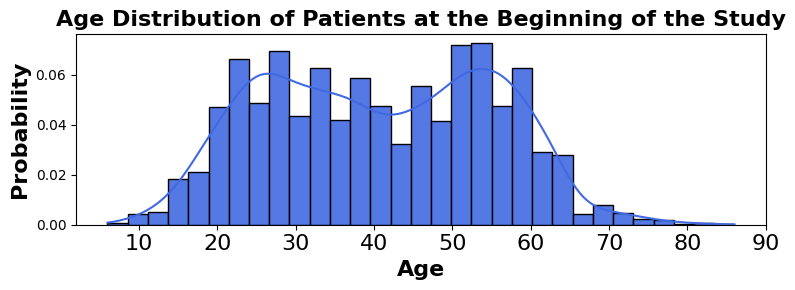

In [352]:
# Plot histogram of 'age' at the beginning, median, and end of the study
age_lst_dict = {'beginning_age': [person['age'][0] for person in people_dict.values()],
                'median_age': [np.median(person['age']) for person in people_dict.values()],
                'end_age': [person['age'][-1] for person in people_dict.values()]}


plt.figure(figsize=(8, 3))
sns.histplot(age_lst_dict['beginning_age'], kde=True, stat="probability", color='royalblue', label='Beginning Age', alpha=0.9)
plt.title("Age Distribution of Patients at the Beginning of the Study", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=16, fontweight='bold')
plt.ylabel("Probability", fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
# plt.legend(age_lst_dict.keys())
plt.tight_layout()
plt.savefig('age_distribution_at_beginning_of_study.pdf', dpi=300)

## Static Covariate Matrix and Mappings to Recorded Values

In [207]:
static_covariates_lst = ['race_common_desc', 'ethnic_common_desc', 'legal_sex_common_desc', 'ed_lvl_common_desc']
exclusion_static_covariates_lst = ['ethnic_common_desc']
# exclusion_static_covariates_lst = []
static_covariates_lst = [covariate for covariate in static_covariates_lst if covariate not in exclusion_static_covariates_lst]

unique_static_covariate_values = {covariate_name: set(data_df[covariate_name]) for covariate_name in static_covariates_lst}

# create a mapping from the unique values to an integer (and vice versa)
static_covariate_mapping = {covariate_name: {value: idx for idx, value in enumerate(unique_static_covariate_values[covariate_name])} for covariate_name in static_covariates_lst}
static_covariate_mapping_reverse = {covariate_name: {idx: value for idx, value in enumerate(unique_static_covariate_values[covariate_name])} for covariate_name in static_covariates_lst}

In [208]:
def update_static_covariate_mapping(static_covariate_mapping, covariate_name):
    """
    Updates a static_covariate_mapping dictionary for a given covariate_name,
    preserving distinct values and reordering sequentially.

    Args:
        static_covariate_mapping (dict): The dictionary containing covariate mappings.
        covariate_name (str): The specific covariate name to update.

    Returns:
        dict: The updated static_covariate_mapping.
    """
    # Extract the covariate mapping for the given covariate_name
    covariate_mapping = static_covariate_mapping[covariate_name]

    # Extract original values
    original_values = list(covariate_mapping.values())

    # Sort unique values, but maintain distinct floating-point values
    unique_values = sorted(set(original_values))

    # Identify all distinct floating-point values to preserve
    distinct_values = {val for val in original_values if isinstance(val, float)}

    # Reorder the mapping, skipping distinct values
    value_mapping = {}
    new_index = 0
    for val in unique_values:
        if val in distinct_values:
            value_mapping[val] = val  # Preserve distinct floating-point values
        else:
            value_mapping[val] = new_index
            new_index += 1

    # Apply the mapping to update the covariate
    static_covariate_mapping[covariate_name] = {
        key: value_mapping[value] for key, value in covariate_mapping.items()
    }

    return static_covariate_mapping


print("Original static_covariate_mapping:")
print(static_covariate_mapping['ed_lvl_common_desc'])
print()

# Update a specific value dynamically
# static_covariate_mapping['ed_lvl_common_desc']['PK-K~Kindergarten / Pre-K'] = (
    # static_covariate_mapping['ed_lvl_common_desc']['1-5~Elementary School (Grade 1-5)'] + 0.5
# )

# Call the function
static_covariate_mapping = update_static_covariate_mapping(static_covariate_mapping, 'ed_lvl_common_desc')
static_covariate_mapping_reverse = {covariate_name: {value: key for key, value in static_covariate_mapping[covariate_name].items()} for covariate_name in static_covariates_lst}

# Display results
print("Updated static_covariate_mapping:")
print(static_covariate_mapping['ed_lvl_common_desc'])

Original static_covariate_mapping:
{'99~Unknown': 0, 'UNDERGRAD~Some College': 1, 'GED~High School Diploma/GED Completed': 2, '9-12~High School (grade 9-12)': 3, 'PK-K~Kindergarten / Pre-K': 4, '1-5~Elementary School (Grade 1-5)': 5, 'GRAD~Graduate Degree': 6, 'GRAD COMP~College Degree': 7, '6-8~Middle School (Grade 6-8)': 8}

Updated static_covariate_mapping:
{'99~Unknown': 0, 'UNDERGRAD~Some College': 1, 'GED~High School Diploma/GED Completed': 2, '9-12~High School (grade 9-12)': 3, 'PK-K~Kindergarten / Pre-K': 4, '1-5~Elementary School (Grade 1-5)': 5, 'GRAD~Graduate Degree': 6, 'GRAD COMP~College Degree': 7, '6-8~Middle School (Grade 6-8)': 8}


In [209]:
static_covariates_matrix = np.zeros((len(people_dict), len(static_covariates_lst)))

for idx, person_key in enumerate(people_dict):
    person = people_dict[person_key]
    current_static_covariates = [static_covariate_mapping[covariate_name][person[covariate_name]] for covariate_name in static_covariates_lst]
    static_covariates_matrix[idx, :] = np.array(current_static_covariates, dtype=int)

In [210]:
static_covariate_mapping

{'race_common_desc': {'99~Unknown': 0,
  '6~Two or More Races': 1,
  '1~White': 2,
  '4~Asian': 3,
  '2~Black/African American': 4,
  '3~American Indian/Alaskan Native': 5},
 'legal_sex_common_desc': {'99~Unknown': 0, '1~Male': 1, '2~Female': 2},
 'ed_lvl_common_desc': {'99~Unknown': 0,
  'UNDERGRAD~Some College': 1,
  'GED~High School Diploma/GED Completed': 2,
  '9-12~High School (grade 9-12)': 3,
  'PK-K~Kindergarten / Pre-K': 4,
  '1-5~Elementary School (Grade 1-5)': 5,
  'GRAD~Graduate Degree': 6,
  'GRAD COMP~College Degree': 7,
  '6-8~Middle School (Grade 6-8)': 8}}

## Low occuring static covariate combinations analysis

In [211]:
# check how many unique rows there are in the static covariates matrix
unique_static_covariate_combination = np.unique(static_covariates_matrix, axis=0, return_counts=True)
low_occurrency_threshold = 5

print(f'Number of unique static covariate combinations: {unique_static_covariate_combination[0].shape[0]}/{static_covariates_matrix.shape[0]}')
print(f'Number of unique static covariate combinations that appear less than {low_occurrency_threshold} times: {np.sum(unique_static_covariate_combination[1] < low_occurrency_threshold)}' +
      f'/{unique_static_covariate_combination[0].shape[0]}')
low_occurrency_threshold = 10
print(f'Number of unique static covariate combinations that appear less than {low_occurrency_threshold} times: {np.sum(unique_static_covariate_combination[1] < low_occurrency_threshold)}' +
      f'/{unique_static_covariate_combination[0].shape[0]}')

Number of unique static covariate combinations: 63/6827
Number of unique static covariate combinations that appear less than 5 times: 25/63
Number of unique static covariate combinations that appear less than 10 times: 31/63


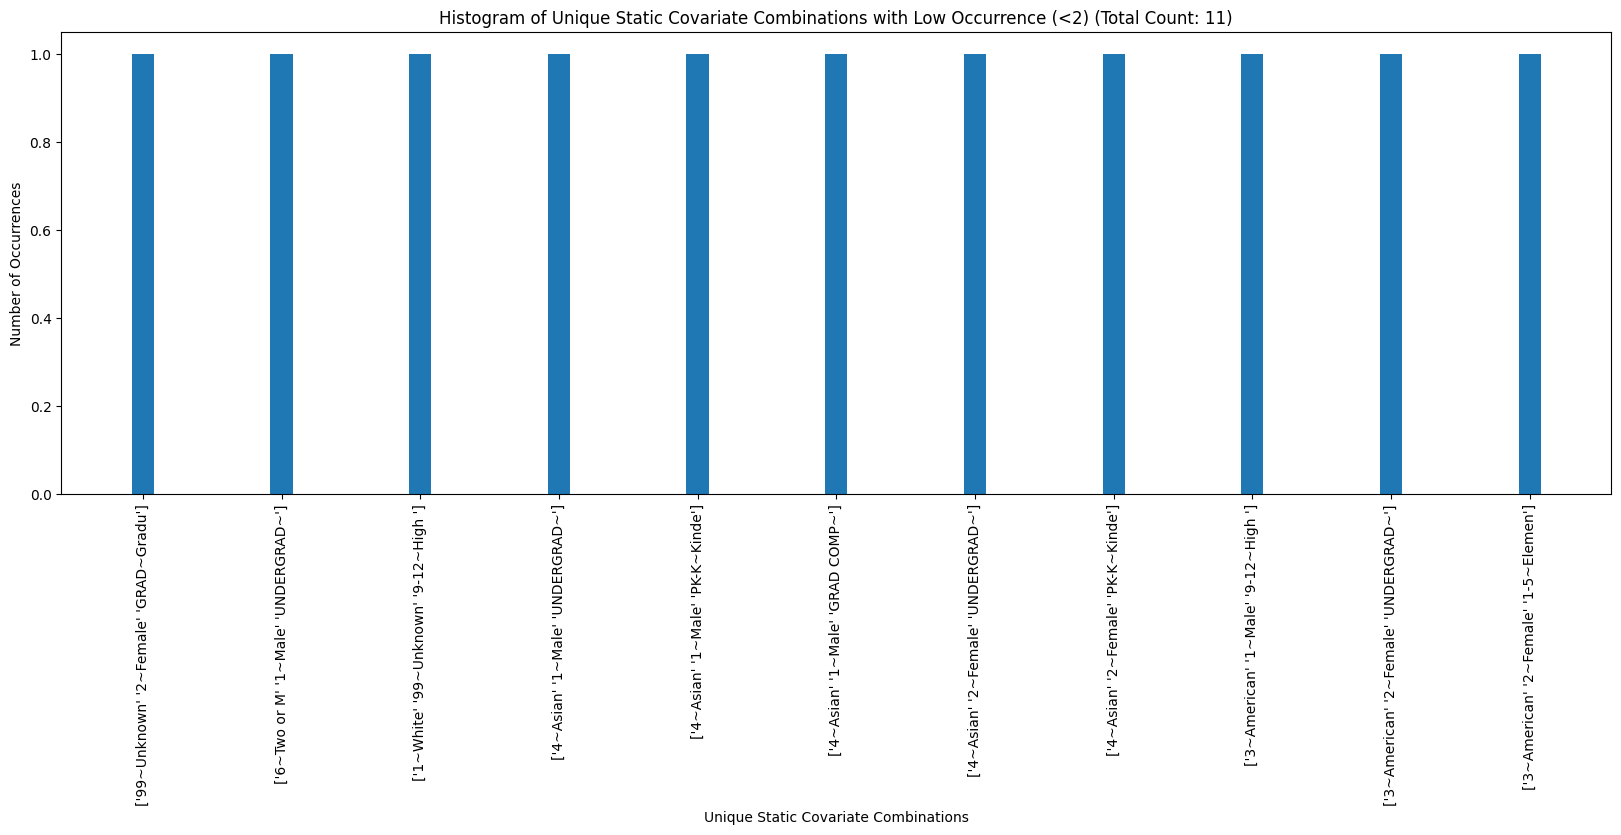

In [212]:
# plot the histogram of x-axis: unique static covariate combinations, y-axis: number of occurrences of that combination, 
# only include combinations that appear less than low_occurrency_threshold times
low_occurrency_threshold = 2

# Step 1: Filter combinations
filtered_combinations = [(comb, count) for comb, count in zip(unique_static_covariate_combination[0], unique_static_covariate_combination[1]) 
                         if count < low_occurrency_threshold]

# Step 2: Extract combinations and counts
combinations = [comb for comb, count in filtered_combinations]
counts = [count for comb, count in filtered_combinations]
combinations_names = [np.array([static_covariate_mapping_reverse[covariate_name][comb[covariate_idx]][:10] 
                                for covariate_idx, covariate_name in enumerate(static_covariates_lst)]) 
                      for comb in combinations]
x_axis_step_size = 5
x_axis_range = range(0, len(combinations)*x_axis_step_size, x_axis_step_size)

# Step 3: Plot the histogram
plt.figure(figsize=(20, 6))
plt.bar(x_axis_range, counts)
plt.xlabel('Unique Static Covariate Combinations')
plt.ylabel('Number of Occurrences')
plt.title(f'Histogram of Unique Static Covariate Combinations with Low Occurrence (<{low_occurrency_threshold}) (Total Count: {len(combinations)})')
plt.xticks(x_axis_range, combinations_names, rotation=90)  # Rotate x-axis labels if needed
plt.show()

### Indices of people with low occurrency static covariate combinations

In [213]:
low_occurrency_threshold = 2

# get the indices of the people that have the static covariate combinatio
count_of_each_static_covariate_combination = [
    unique_static_covariate_combination[1][np.where(np.all(unique_static_covariate_combination[0] == person_covariate, axis=1))[0][0]]
        if np.any(np.all(unique_static_covariate_combination[0] == person_covariate, axis=1)) else 0 # else should not happen
        for person_covariate in static_covariates_matrix
]

assert min(count_of_each_static_covariate_combination) > 0

# get the indices of the people that have the static covariate combination that appears less than low_occurrency_threshold times
low_occurrency_static_covariate_combination_indices = np.where(np.array(count_of_each_static_covariate_combination) < low_occurrency_threshold)[0]

# Timestep Analysis of Data

## Check that there is no missing timestep for each datapoint

In [214]:
people_with_skipped_timestep = []
people_with_not_starting_zero = []

for idx, person in enumerate(people_dict.values()):
    if len(person['relative_ym'])-1 != round(person['relative_ym'][-1]):
        people_with_skipped_timestep.append(idx)
    if round(person['relative_ym'][0]) != 0:
        people_with_not_starting_zero.append(idx)
    # break

print('Number of people with skipped timesteps:', len(people_with_skipped_timestep))
print('Number of people that do not start at 0:', len(people_with_not_starting_zero))

Number of people with skipped timesteps: 0
Number of people that do not start at 0: 0


## Number of timesteps per person

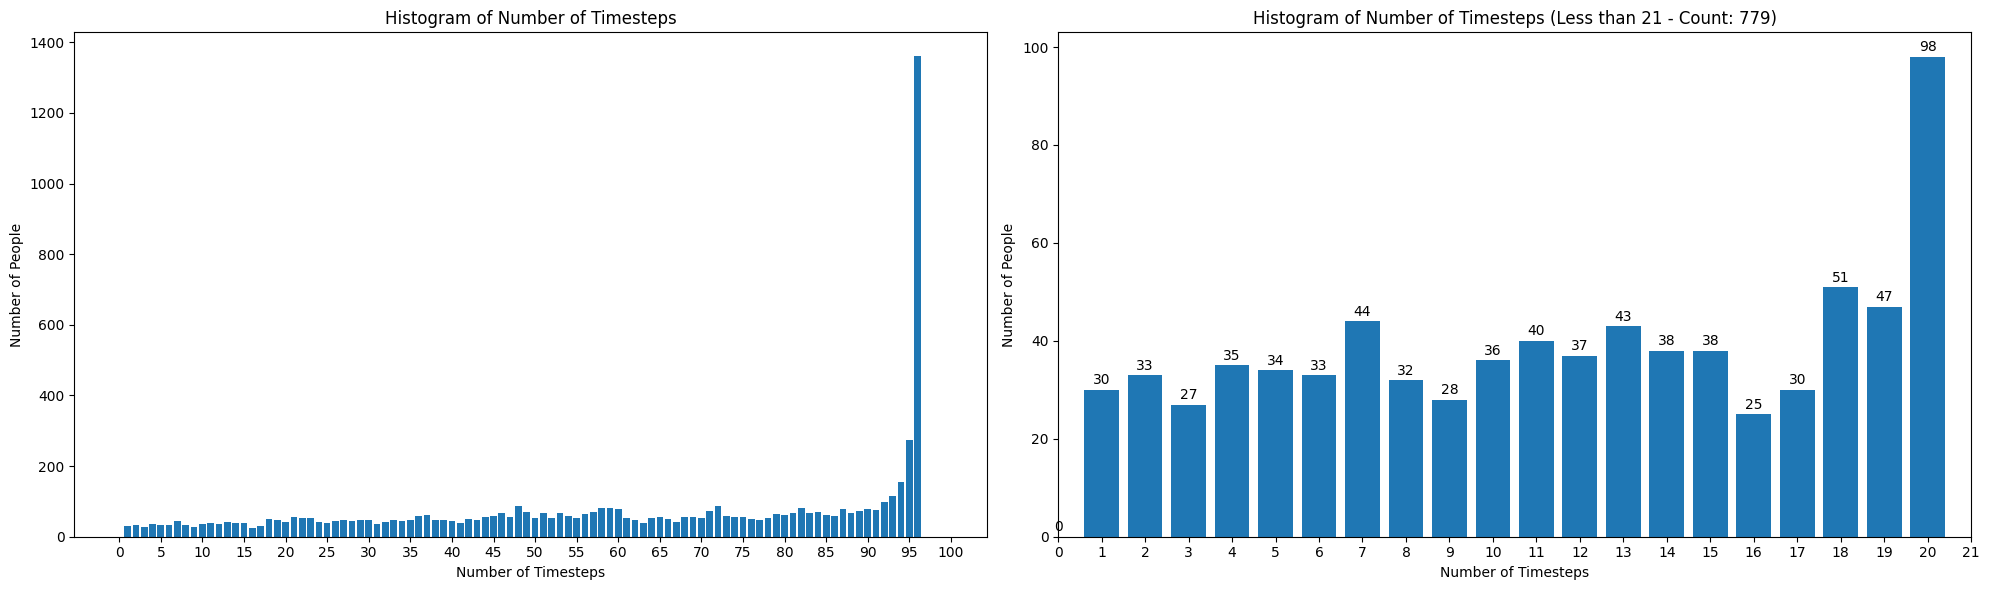

Minimum number of timesteps: 1
Maximum number of timesteps: 96
Mean number of timesteps: 64.24
Standard deviation of number of timesteps: 29.24

10% percentile of timesteps: 20.0
25% percentile of timesteps: 41.0
Median number of timesteps: 70.0
75% percentile of timesteps: 94.0
90% percentile of timesteps: 96.0


In [215]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for testing
# people_dict = {'id1': {'relative_ym': [1, 2, 3]}, 'id2': {'relative_ym': [1]}, ...}
number_of_timesteps_lst = [len(person['relative_ym'][:person['death_time']+1]) for person in people_dict.values()]

# Plot the integer histogram of the number of timesteps
plt.figure(figsize=(20, 6))

# Left subplot: Full range histogram
plt.subplot(1, 2, 1)
plt.hist(number_of_timesteps_lst, bins=range(0, 101), align='left', rwidth=0.8)
plt.xlabel('Number of Timesteps')
plt.ylabel('Number of People')
plt.title('Histogram of Number of Timesteps')
plt.xticks(range(0, 101, 5))  # Adjust x-axis ticks to show every 5 timesteps

# Right subplot: Histogram of number of timesteps less than threshold
threshold_num_timesteps = 21
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(number_of_timesteps_lst, bins=range(0, threshold_num_timesteps+1), align='left', rwidth=0.8)
plt.xlabel('Number of Timesteps')
plt.ylabel('Number of People')
plt.title(f'Histogram of Number of Timesteps (Less than {threshold_num_timesteps} - Count: {sum(n):.0f})')
plt.xlim(0, threshold_num_timesteps)
plt.ylim(0, max(n) + 5)
plt.xticks(range(0, threshold_num_timesteps+1, 1))  # Show integer ticks for timesteps

# Annotate counts on top of bars in the right subplot
for i in range(len(n)):
    plt.text(bins[i], n[i] + 0.5, str(int(n[i])), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Print summary statistics
print(f'Minimum number of timesteps: {min(number_of_timesteps_lst)}')
print(f'Maximum number of timesteps: {max(number_of_timesteps_lst)}')
print(f'Mean number of timesteps: {np.mean(number_of_timesteps_lst):.2f}')
print(f'Standard deviation of number of timesteps: {np.std(number_of_timesteps_lst):.2f}')
print()
print(f'10% percentile of timesteps: {np.percentile(number_of_timesteps_lst, 10)}')
print(f'25% percentile of timesteps: {np.percentile(number_of_timesteps_lst, 25)}')
print(f'Median number of timesteps: {np.median(number_of_timesteps_lst)}')
print(f'75% percentile of timesteps: {np.percentile(number_of_timesteps_lst, 75)}')
print(f'90% percentile of timesteps: {np.percentile(number_of_timesteps_lst, 90)}')


## Multiple Events in a Single Timestep

In [216]:
one_event_in_same_month = []
two_events_in_same_month = []
three_events_in_same_month = []
two_events_302_jail_in_same_month = []
two_events_302_death_in_same_month = []
two_events_jail_death_in_same_month = []
no_event, at_least_one_302_event, at_least_one_jail_event, at_least_one_death_event = [], [], [], []

for person in people_dict.values():
    one_event_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1], axis=1)==1))
    two_events_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1], axis=1)==2))
    three_events_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1], axis=1)==3))
    two_events_302_jail_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1, :2], axis=1)==2))
    two_events_302_death_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1, [0,2]], axis=1)==2))
    two_events_jail_death_in_same_month.append(sum(np.sum(person['combined_events'][:person['death_time']+1, 1:], axis=1)==2))
    no_event.append(int(np.max(person['combined_events'][:person['death_time']+1])==0))
    at_least_one_302_event.append(np.max(person['ind_302'][:person['death_time']+1]))
    at_least_one_jail_event.append(np.max(person['ind_jail'][:person['death_time']+1]))
    at_least_one_death_event.append(np.max(person['ind_death'][:person['death_time']+1]))

one_event_in_same_month = np.array(one_event_in_same_month)
two_events_in_same_month = np.array(two_events_in_same_month)
three_events_in_same_month = np.array(three_events_in_same_month)
two_events_302_jail_in_same_month = np.array(two_events_302_jail_in_same_month)
two_events_302_death_in_same_month = np.array(two_events_302_death_in_same_month)
two_events_jail_death_in_same_month = np.array(two_events_jail_death_in_same_month)
no_event = np.array(no_event)
at_least_one_302_event, at_least_one_jail_event, at_least_one_death_event = np.array(at_least_one_302_event), np.array(at_least_one_jail_event), np.array(at_least_one_death_event)

non_zero_one_event_in_same_month = one_event_in_same_month[one_event_in_same_month != 0]
non_zero_two_events_in_same_month = two_events_in_same_month[two_events_in_same_month != 0]
non_zero_three_events_in_same_month = three_events_in_same_month[three_events_in_same_month != 0]
non_zero_two_events_302_jail_in_same_month = two_events_302_jail_in_same_month[two_events_302_jail_in_same_month != 0]
non_zero_two_events_302_death_in_same_month = two_events_302_death_in_same_month[two_events_302_death_in_same_month != 0]
non_zero_two_events_jail_death_in_same_month = two_events_jail_death_in_same_month[two_events_jail_death_in_same_month != 0]

print(f'Number of people with no event: {sum(no_event)}/{len(no_event)} = {sum(no_event)/len(no_event)*100:.2f}%' )
print(f'Number of people with at least one occurrence of 302: {sum(at_least_one_302_event)}/{len(at_least_one_302_event)} = {sum(at_least_one_302_event)/len(at_least_one_302_event)*100:.2f}%' )
print(f'Number of people with at least one occurrence of jail: {sum(at_least_one_jail_event)}/{len(at_least_one_jail_event)} ' + 
      f'= {sum(at_least_one_jail_event)/len(at_least_one_jail_event)*100:.2f}%' )
print(f'Number of people with at least one occurrence of death: {sum(at_least_one_death_event)}/{len(at_least_one_death_event)} ' +
       f'= {sum(at_least_one_death_event)/len(at_least_one_death_event)*100:.2f}%' )
print()
print(f'Number of people with at least one occurrence of one event: {len(non_zero_one_event_in_same_month)}/{len(one_event_in_same_month)}' +
        f'= {len(non_zero_one_event_in_same_month)/len(one_event_in_same_month)*100:.2f}%' )
print(f'\tNumber of people with no occurrence of one events: {len(one_event_in_same_month)-len(non_zero_one_event_in_same_month)}')
print('\tTotal number of people:', len(one_event_in_same_month))
print(f'Number of people with at least one occurrence of two events in the same month: {len(non_zero_two_events_in_same_month)}/{len(two_events_in_same_month)}' +
        f'= {len(non_zero_two_events_in_same_month)/len(two_events_in_same_month)*100:.2f}%' )
print(f'\tNumber of people with at least one occurrence of 302 and jail in the same month: {len(non_zero_two_events_302_jail_in_same_month)}/{len(two_events_302_jail_in_same_month)}' +
        f'= {len(non_zero_two_events_302_jail_in_same_month)/len(two_events_302_jail_in_same_month)*100:.2f}%' )
print(f'\tNumber of people with at least one occurrence of 302 and death in the same month: {len(non_zero_two_events_302_death_in_same_month)}/{len(two_events_302_death_in_same_month)}' +
        f'= {len(non_zero_two_events_302_death_in_same_month)/len(two_events_302_death_in_same_month)*100:.2f}%' )
print(f'\tNumber of people with at least one occurrence of jail and death in the same month: {len(non_zero_two_events_jail_death_in_same_month)}/{len(two_events_jail_death_in_same_month)}' +
        f'= {len(non_zero_two_events_jail_death_in_same_month)/len(two_events_jail_death_in_same_month)*100:.2f}%' )
print(f'Number of people with at least one occurrence of three events in the same month: {len(non_zero_three_events_in_same_month)}/{len(three_events_in_same_month)}' +
        f'= {len(non_zero_three_events_in_same_month)/len(three_events_in_same_month)*100:.2f}%' )

Number of people with no event: 3231/6827 = 47.33%
Number of people with at least one occurrence of 302: 2334/6827 = 34.19%
Number of people with at least one occurrence of jail: 1516/6827 = 22.21%
Number of people with at least one occurrence of death: 807/6827 = 11.82%

Number of people with at least one occurrence of one event: 3578/6827= 52.41%
	Number of people with no occurrence of one events: 3249
	Total number of people: 6827
Number of people with at least one occurrence of two events in the same month: 206/6827= 3.02%
	Number of people with at least one occurrence of 302 and jail in the same month: 196/6827= 2.87%
	Number of people with at least one occurrence of 302 and death in the same month: 8/6827= 0.12%
	Number of people with at least one occurrence of jail and death in the same month: 2/6827= 0.03%
Number of people with at least one occurrence of three events in the same month: 0/6827= 0.00%


In [225]:
def print_summary_statistics(first_event_lst_simplified, event_type=""):
    first_event_lst_times_exclude_no_event = first_event_lst_simplified[first_event_lst_simplified[:,1] != 0][:,0]+1
    event_type = " "+event_type if event_type != "" else event_type
    # Print summary statistics
    print(f'First{event_type} Event Times Summary Statistics:')
    print(f'Minimum number of timesteps to 1st{event_type} event: {min(first_event_lst_times_exclude_no_event)}')
    print(f'Maximum number of timesteps to 1st{event_type} event: {max(first_event_lst_times_exclude_no_event)}')
    print(f'Mean number of timesteps to 1st{event_type} event: {np.mean(first_event_lst_times_exclude_no_event):.2f}')
    print(f'Standard deviation of number of timesteps to 1st{event_type} event: {np.std(first_event_lst_times_exclude_no_event):.2f}')
    print()
    print(f'10% percentile of timesteps to 1st{event_type} event: {np.percentile(first_event_lst_times_exclude_no_event, 10)}')
    print(f'25% percentile of timesteps to 1st{event_type} event: {np.percentile(first_event_lst_times_exclude_no_event, 25)}')
    print(f'Median number of timesteps to 1st{event_type} event: {np.median(first_event_lst_times_exclude_no_event)}')
    print(f'75% percentile of timesteps to 1st{event_type} event: {np.percentile(first_event_lst_times_exclude_no_event, 75)}')
    print(f'90% percentile of timesteps to 1st{event_type} event: {np.percentile(first_event_lst_times_exclude_no_event, 90)}')

print('First Event (Any time step)')
print_summary_statistics(first_event_lst_simplified)

First Event (Any time step)
First Event Times Summary Statistics:
Minimum number of timesteps to 1st event: 1.0
Maximum number of timesteps to 1st event: 96.0
Mean number of timesteps to 1st event: 22.12
Standard deviation of number of timesteps to 1st event: 22.75

10% percentile of timesteps to 1st event: 1.0
25% percentile of timesteps to 1st event: 4.0
Median number of timesteps to 1st event: 14.0
75% percentile of timesteps to 1st event: 33.0
90% percentile of timesteps to 1st event: 57.0


# Timestep Analysis of Data (Multi-Event)

In [227]:
# 302, jail, death
first_event_lst = []
first_302_event_lst, first_jail_event_lst, first_death_event_lst = [], [], []

for person in people_dict.values():
    # Any event: sum of the row >= 1 save the first index of this where the key is the time index and the value is the combined event
    person_event_indices = np.where(np.sum(person['combined_events'][:person['death_time']+1], axis=1) >= 1)[0]
    if len(person_event_indices) > 0:
        event_time_type = np.concatenate([[person_event_indices[0]], 
                                           person['combined_events'][person_event_indices[0]]])
    else:
        event_time_type = np.concatenate([[len(person['combined_events'][:person['death_time']+1])-1], 
                                           np.zeros(3)])
    first_event_lst.append(event_time_type)

    # 302 event
    person_302_event_indices = np.where(person['ind_302'][:person['death_time']+1] >= 1)[0]
    if len(person_302_event_indices) > 0:
        event_time_type = np.concatenate([[person_302_event_indices[0]], 
                                           person['combined_events'][person_302_event_indices[0]]])
    else:
        event_time_type = np.concatenate([[len(person['combined_events'][:person['death_time']+1])-1], 
                                           np.zeros(3)])
    first_302_event_lst.append(event_time_type)

    # jail event
    person_jail_event_indices = np.where(person['ind_jail'][:person['death_time']+1] >= 1)[0]
    if len(person_jail_event_indices) > 0:
        event_time_type = np.concatenate([[person_jail_event_indices[0]], 
                                           person['combined_events'][person_jail_event_indices[0]]])
    else:
        event_time_type = np.concatenate([[len(person['combined_events'][:person['death_time']+1])-1], 
                                           np.zeros(3)])
    first_jail_event_lst.append(event_time_type)

    # death event
    person_death_event_indices = np.where(person['ind_death'][:person['death_time']+1] >= 1)[0]
    if len(person_death_event_indices) > 0:
        event_time_type = np.concatenate([[person_death_event_indices[0]], 
                                           person['combined_events'][person_death_event_indices[0]]])
    else:
        event_time_type = np.concatenate([[len(person['combined_events'][:person['death_time']+1])-1], 
                                           np.zeros(3)])
    first_death_event_lst.append(event_time_type)
        
first_event_lst = np.array(first_event_lst)
first_302_event_lst = np.array(first_302_event_lst)
first_jail_event_lst = np.array(first_jail_event_lst)
first_death_event_lst = np.array(first_death_event_lst)

In [238]:
# Simplify list of first events (0: no event, 1: 302, 2: jail, 3: death, 4: 302+jail, 5: 302+death, 6: jail+death, 7: 302+jail+death)
# first element is timestep of first event, and second element is the type of event

first_event_lst_simplified = np.zeros((first_event_lst.shape[0], 2))
first_event_lst_simplified[:, 0] = first_event_lst[:, 0]

first_302_event_lst_simplified = np.zeros((first_302_event_lst.shape[0], 2))
first_302_event_lst_simplified[:, 0] = first_302_event_lst[:, 0]
first_jail_event_lst_simplified = np.zeros((first_jail_event_lst.shape[0], 2))
first_jail_event_lst_simplified[:, 0] = first_jail_event_lst[:, 0]
first_death_event_lst_simplified = np.zeros((first_death_event_lst.shape[0], 2))
first_death_event_lst_simplified[:, 0] = first_death_event_lst[:, 0]

def update_lst_simplified(first_event_lst, first_event_lst_simplified):
    for idx in range(first_event_lst.shape[0]):
        if sum(first_event_lst[idx, 1:]) == 0:
            first_event_lst_simplified[idx, 1] = 0
        elif sum(first_event_lst[idx, 1:]) == 1:
            if first_event_lst[idx, 1] == 1:
                first_event_lst_simplified[idx, 1] = 1 #302
            elif first_event_lst[idx, 2] == 1:
                first_event_lst_simplified[idx, 1] = 2 #jail
            elif first_event_lst[idx, 3] == 1:
                first_event_lst_simplified[idx, 1] = 3 #death
        elif sum(first_event_lst[idx, 1:]) == 2:
            if first_event_lst[idx, 1] == 1 and first_event_lst[idx, 2] == 1: #302, jail
                first_event_lst_simplified[idx, 1] = 4
            elif first_event_lst[idx, 1] == 1 and first_event_lst[idx, 3] == 1: #302, death
                first_event_lst_simplified[idx, 1] = 5
            elif first_event_lst[idx, 2] == 1 and first_event_lst[idx, 3] == 1: #jail, death
                first_event_lst_simplified[idx, 1] = 6
        else: #if sum(first_event_lst[idx, 1:]) == 3: #302, jail, death
            first_event_lst_simplified[idx, 1] = 7


update_lst_simplified(first_event_lst, first_event_lst_simplified)
update_lst_simplified(first_302_event_lst, first_302_event_lst_simplified)
update_lst_simplified(first_jail_event_lst, first_jail_event_lst_simplified)
update_lst_simplified(first_death_event_lst, first_death_event_lst_simplified)
first_event_lst_simplified

array([[35.,  2.],
       [20.,  0.],
       [11.,  0.],
       ...,
       [ 0.,  1.],
       [ 0.,  0.],
       [ 6.,  0.]])

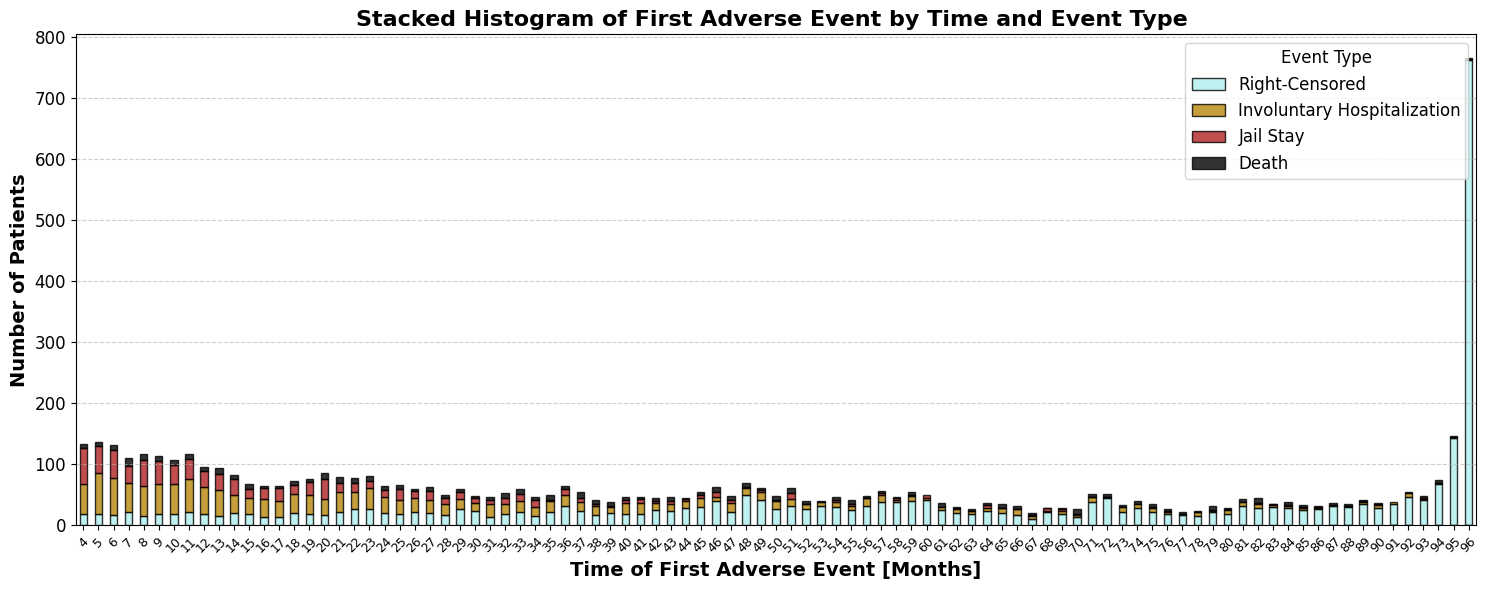

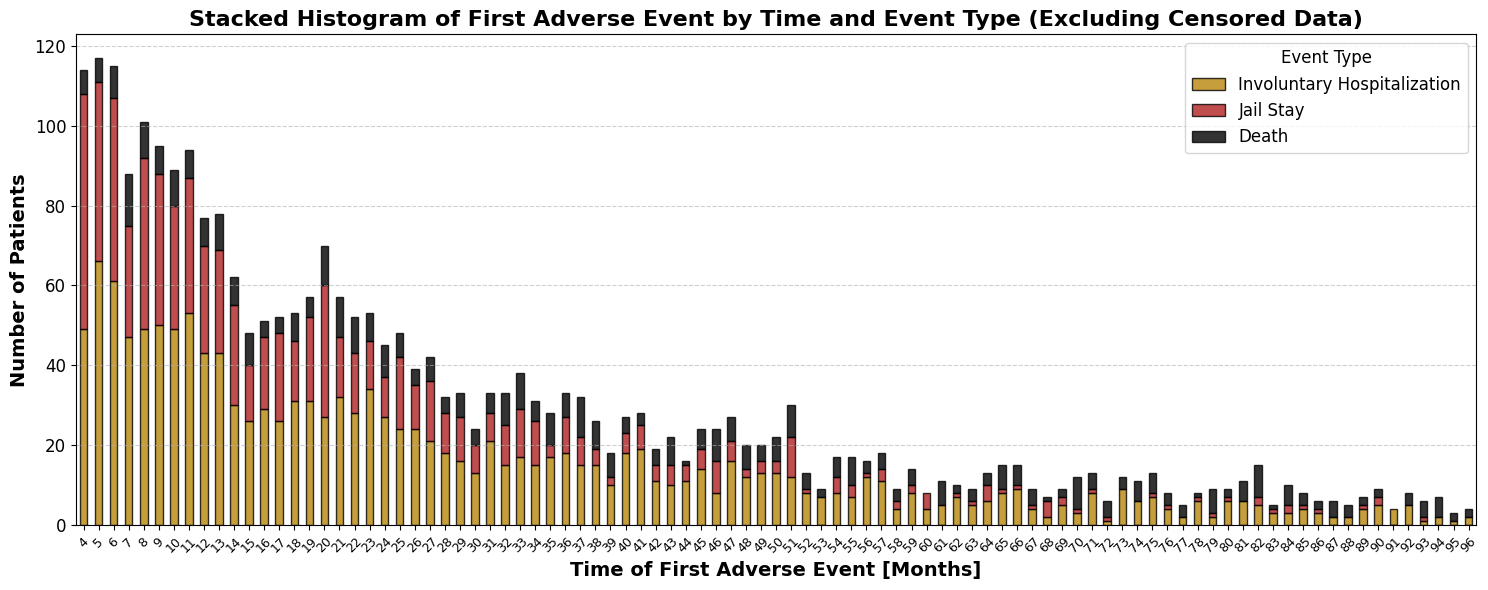

In [270]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_first_event_histogram_paper_ready(first_event_lst_simplified, event_type_labels, title_suffix='', exclude_no_event=False):
    """
    Creates a paper-ready stacked bar plot for first events, categorized by time and event type.

    Args:
        first_event_lst_simplified (list of lists): Simplified first event data with 'time' and 'event_type'.
        event_type_labels (dict): Custom labels for event types.
        title_suffix (str): Optional suffix for the plot title.
        exclude_no_event (bool): If True, exclude rows where 'event_type' is 0.

    Returns:
        None
    """
    # Convert to DataFrame
    first_event_df = pd.DataFrame(first_event_lst_simplified, columns=['time', 'event_type'])

    # Ensure correct data types
    first_event_df['time'] = first_event_df['time'].astype(int) + 1
    first_event_df['event_type'] = first_event_df['event_type'].astype(int)

    # Map event types: if event_type == 4, map to 1; if event_type >= 5, map to 3
    first_event_df['event_type'] = first_event_df['event_type'].apply(
        lambda x: 1 if x == 4 else (3 if x >= 5 else x)
    )

    first_event_df = first_event_df[first_event_df['time']>3]

    # Exclude "no event" rows if specified
    if exclude_no_event:
        first_event_df = first_event_df[first_event_df['event_type'] != 0]

    # Group by 'time' and 'event_type', then count occurrences
    counts = first_event_df.groupby(['time', 'event_type']).size().unstack(fill_value=0)

    # Ensure all event types are included in columns (even if some are missing in the data)
    all_event_types = list(event_type_labels.keys())
    counts = counts.reindex(columns=all_event_types, fill_value=0)

    # Rename the columns using the custom labels
    counts.rename(columns=event_type_labels, inplace=True)

    # Sort the index if necessary
    counts = counts.sort_index()

    # Define custom colors for event types
    color_map = {
        'Right-Censored': 'paleturquoise',
        'Involuntary Hospitalization': 'darkgoldenrod',
        'Jail Stay': 'firebrick',
        'Death': 'black',
    }
    colors = [color_map[label] for label in counts.columns]

    # Plot the stacked bar chart
    ax = counts.plot(kind='bar', stacked=True, figsize=(15, 6), color=colors, edgecolor='black', alpha=0.8)

    # Customize the plot
    plt.xlabel('Time of First Adverse Event [Months]', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Patients', fontsize=14, fontweight='bold')
    plt.title(
        f'Stacked Histogram of First Adverse Event by Time and Event Type {title_suffix}', # - Total: {len(first_event_df)}',
        fontsize=16, fontweight='bold'
    )
    plt.legend(title='Event Type', loc='upper right', fontsize=12, title_fontsize=12)
    plt.xticks(fontsize=9, rotation=45)
    plt.yticks(fontsize=12)

    # Add subtle gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Adjust layout for better spacing
    plt.tight_layout()

    if title_suffix == "":
        plt.savefig(f'first_event_time_histogram.pdf', dpi=300)
    elif "exclud" in title_suffix.lower():
        plt.savefig(f'first_event_time_histogram_exclude_no_event.pdf', dpi=300)

    # Show the plot
    plt.show()


# Define custom labels for event types
event_type_labels = {
    0: 'Right-Censored',
    1: 'Involuntary Hospitalization',
    2: 'Jail Stay',
    3: 'Death',
}

event_type_exclusion_labels = {event_id: event_label for event_id, event_label in event_type_labels.items() if event_id != 0}

# Example usage
plot_stacked_first_event_histogram_paper_ready(first_event_lst_simplified, event_type_labels)
plot_stacked_first_event_histogram_paper_ready(
    first_event_lst_simplified, event_type_exclusion_labels, title_suffix='(Excluding Censored Data)', exclude_no_event=True
)
# plot_stacked_first_event_histogram(first_302_event_lst_simplified, event_type_labels, '(302 Event)')
# plot_stacked_first_event_histogram(first_302_event_lst_simplified[first_302_event_lst_simplified[:,1] != 0], event_type_labels, '(302 Event - excluding no event)')
# plot_stacked_first_event_histogram(first_jail_event_lst_simplified, event_type_labels, '(Jail Event)')
# plot_stacked_first_event_histogram(first_jail_event_lst_simplified[first_jail_event_lst_simplified[:,1] != 0], event_type_labels, '(Jail Event - excluding no event)')
# plot_stacked_first_event_histogram(first_death_event_lst_simplified, event_type_labels, '(Death Event)')
# plot_stacked_first_event_histogram(first_death_event_lst_simplified[first_death_event_lst_simplified[:,1] != 0], event_type_labels, '(Death Event - excluding no event)')

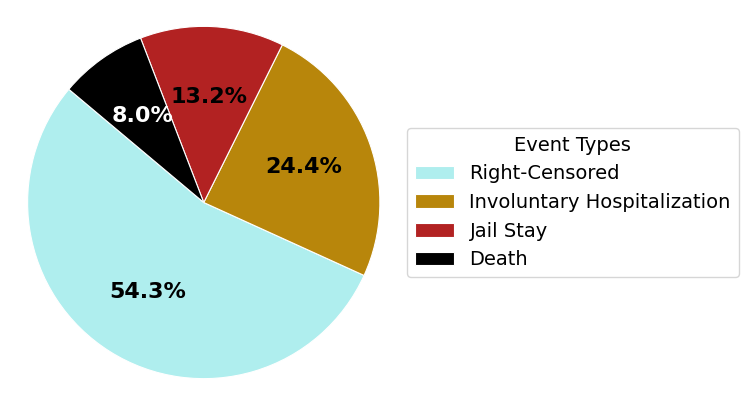

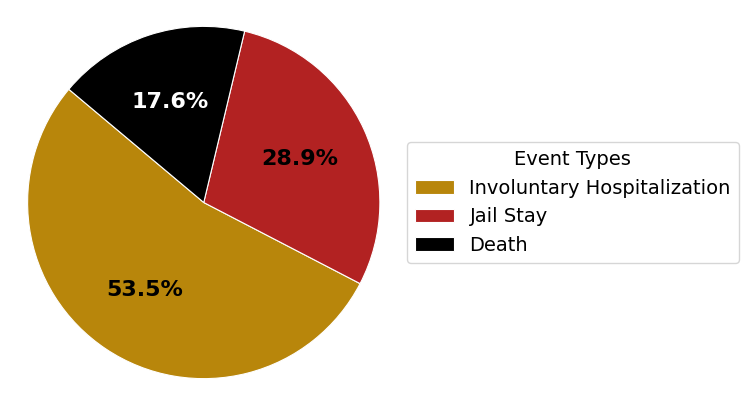

In [349]:
def plot_piechart_with_legend_paper_ready(data, title_suffix="", colors=None):
    """
    Creates a paper-ready pie chart with a legend for event type distribution.

    Args:
        data (list of lists): Data containing 'time' and 'event_type'.
        title_suffix (str): Optional suffix for the plot title.
        colors (list): List of colors for the pie chart wedges.

    Returns:
        None
    """
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=['time', 'event_type'])

    # Ensure correct data types
    df['time'] = df['time'].astype(int)
    df['event_type'] = df['event_type'].astype(int)

    # Map event types: if event_type == 4, map to 1; if event_type >= 5, map to 3
    df['event_type'] = df['event_type'].apply(
        lambda x: 1 if x == 4 else (3 if x >= 5 else x)
    )

    df = df[df['time'] > 3]

    # Define custom labels for event types
    event_type_labels = {
        0: 'Right-Censored',
        1: 'Involuntary Hospitalization',
        2: 'Jail Stay',
        3: 'Death',
    }

    # Count occurrences of each event type
    event_counts = df['event_type'].value_counts().sort_index()

    # Get labels and sizes
    labels = [event_type_labels[i] for i in event_counts.index]
    sizes = event_counts.values

    # Define colors if not provided
    if colors is None:
        colors = {
            'Right-Censored': 'paleturquoise',
            'Involuntary Hospitalization': 'darkgoldenrod',
            'Jail Stay': 'firebrick',
            'Death': 'black'
        }
        colors = [colors[label] for label in labels]

    # Plot the pie chart
    plt.figure(figsize=(5, 5))  # Adjusted to a square aspect ratio
    wedges, texts, autotexts = plt.pie(
        sizes,
        colors=colors,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 16, 'fontweight': 'bold'},
        wedgeprops={'linewidth': 0.8, 'edgecolor': 'white'}
    )

    # Change text color to white for the "Death" wedge
    for i, wedge in enumerate(wedges):
        if labels[i] == 'Death':
            autotexts[i].set_color('white')

    # Customize the legend
    plt.legend(wedges, labels, title="Event Types", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize=14, fontsize=14)

    # Make the plot layout tight
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

    # Save the figure with minimal white space
    if title_suffix == "":
        plt.savefig('first_event_type_piechart.pdf', dpi=300, bbox_inches='tight')
    elif "exclud" in title_suffix.lower():
        plt.savefig('first_event_type_piechart_exclude_no_event.pdf', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


# Example usage
plot_piechart_with_legend_paper_ready(first_event_lst_simplified)
plot_piechart_with_legend_paper_ready(
    first_event_lst_simplified[first_event_lst_simplified[:, 1] != 0],
    '(Excluding Censored Data)',
    colors=['darkgoldenrod', 'firebrick', 'black']
)


In [ ]:
# mean time to first adverse event
SNAPSHOT_TIME = 3 # [months] (0 based index)
first_event_lst_simplified[(first_event_lst_simplified[:, 1] > 0) & (first_event_lst_simplified[:,0] >= SNAPSHOT_TIME), 0].mean()
print(f"Mean time to first adverse event: {first_event_lst_simplified[first_event_lst_simplified[:, 1] > 0, 0].mean()-SNAPSHOT_TIME:.1f} +/- {first_event_lst_simplified[first_event_lst_simplified[:, 1] > 0, 0].std():.1f} months")
print(f"Mean censoring time: {first_event_lst_simplified[first_event_lst_simplified[:, 1] == 0, 0].mean()-SNAPSHOT_TIME:.1f} +/- {first_event_lst_simplified[first_event_lst_simplified[:, 1] == 0, 0].std():.1f} months")

Mean time to first adverse event: 18.1 +/- 22.7 months
Mean censoring time: 60.7 +/- 29.9 months


In [ ]:
HORIZON = 12 # [months]
SNAPSHOT_TIME = 3 # [months] (0 based index)

TOTAL_NUM_PATIENTS = len(first_event_lst_simplified)
TOTAL_NUM_PATENTIS_SNAPSHOT = len(first_event_lst_simplified[first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME])
NUM_PATIENTS_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME) & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_302_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 1) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_JAIL_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 2) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_DEATH_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 3) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_302_JAIL_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 4) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_302_DEATH_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 5)
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_JAIL_DEATH_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 6) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_302_JAIL_DEATH_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 7) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_CENSORED_IN_FIRST_YEAR = len(first_event_lst_simplified[(first_event_lst_simplified[:, 1] == 0) 
                                        & (first_event_lst_simplified[:, 0] >= SNAPSHOT_TIME)
                                        & (first_event_lst_simplified[:, 0] <= HORIZON+SNAPSHOT_TIME)])
NUM_PATIENTS_ADVERSE_IN_FIRST_YEAR = NUM_PATIENTS_FIRST_YEAR - NUM_PATIENTS_CENSORED_IN_FIRST_YEAR

print(f'Total number of patients: {TOTAL_NUM_PATIENTS} (Snapshot {SNAPSHOT_TIME}: {TOTAL_NUM_PATENTIS_SNAPSHOT})')
print(f'Number of patients with first event within the first year: {NUM_PATIENTS_FIRST_YEAR}')
print(f'Number of patients with 302 event within the first year: {NUM_PATIENTS_302_IN_FIRST_YEAR}')
print(f'Number of patients with jail event within the first year: {NUM_PATIENTS_JAIL_IN_FIRST_YEAR}')
print(f'Number of patients with death event within the first year: {NUM_PATIENTS_DEATH_IN_FIRST_YEAR}')
print(f'Number of patients with 302 and jail events within the first year: {NUM_PATIENTS_302_JAIL_IN_FIRST_YEAR}')
print(f'Number of patients with 302 and death events within the first year: {NUM_PATIENTS_302_DEATH_IN_FIRST_YEAR}')
print(f'Number of patients with jail and death events within the first year: {NUM_PATIENTS_JAIL_DEATH_IN_FIRST_YEAR}')
print(f'Number of patients with 302, jail, and death events within the first year: {NUM_PATIENTS_302_JAIL_DEATH_IN_FIRST_YEAR}')
print(f'Number of patients with adverse event within the first year: {NUM_PATIENTS_ADVERSE_IN_FIRST_YEAR}')
print(f'Number of patients with no event within the first year: {NUM_PATIENTS_CENSORED_IN_FIRST_YEAR}')
print()

print(f'Percentage of patients with first event or censoring within one year [from snapshot {SNAPSHOT_TIME}]: {NUM_PATIENTS_FIRST_YEAR/TOTAL_NUM_PATENTIS_SNAPSHOT*100:.0f}%')
print(f'Percentage of patients with first event within one year [from snapshot {SNAPSHOT_TIME}]: {(NUM_PATIENTS_FIRST_YEAR-NUM_PATIENTS_CENSORED_IN_FIRST_YEAR)/TOTAL_NUM_PATENTIS_SNAPSHOT*100:.0f}%')
print(f'Percentage of patients with adverse event within first year: {(NUM_PATIENTS_FIRST_YEAR-NUM_PATIENTS_CENSORED_IN_FIRST_YEAR)/NUM_PATIENTS_FIRST_YEAR*100:.0f}%')
print(f'Percentage of patients censoring within the first year: {NUM_PATIENTS_CENSORED_IN_FIRST_YEAR/NUM_PATIENTS_FIRST_YEAR*100:.0f}%')
print(f'Conditional Percentage of patients with 302 event within the first year: {(NUM_PATIENTS_302_IN_FIRST_YEAR + NUM_PATIENTS_302_JAIL_IN_FIRST_YEAR)/NUM_PATIENTS_ADVERSE_IN_FIRST_YEAR*100:.0f}%')
print(f'Conditional Percentage of patients with jail event within the first year: {(NUM_PATIENTS_JAIL_IN_FIRST_YEAR)/NUM_PATIENTS_ADVERSE_IN_FIRST_YEAR*100:.0f}%')
print(f'Conditional Percentage of patients with death event within the first year: {(NUM_PATIENTS_DEATH_IN_FIRST_YEAR+NUM_PATIENTS_302_DEATH_IN_FIRST_YEAR+NUM_PATIENTS_JAIL_DEATH_IN_FIRST_YEAR)/NUM_PATIENTS_ADVERSE_IN_FIRST_YEAR*100:.0f}%')
# print(f'Conditional Percentage of patients with censoring within the first year: {NUM_PATIENTS_CENSORED_IN_FIRST_YEAR/NUM_PATIENTS_FIRST_YEAR*100:.1f}%')

Total number of patients: 6827 (Snapshot 3: 5960)
Number of patients with first event within the first year: 1366
Number of patients with 302 event within the first year: 579
Number of patients with jail event within the first year: 434
Number of patients with death event within the first year: 100
Number of patients with 302 and jail events within the first year: 16
Number of patients with 302 and death events within the first year: 0
Number of patients with jail and death events within the first year: 0
Number of patients with 302, jail, and death events within the first year: 0
Number of patients with adverse event within the first year: 1129
Number of patients with no event within the first year: 237

Percentage of patients with first event or censoring within one year [from snapshot 3]: 23%
Percentage of patients with first event within one year [from snapshot 3]: 19%
Percentage of patients with adverse event within first year: 83%
Percentage of patients censoring within the first

# Non-Integer Adherence

In [22]:
non_int_adherence_count = []
num_days_in_month_to_exclude = 1

for person in people_dict.values():
    non_int_adherence_count.append(sum([1 for adherence in person['non_covered_days'][:person['death_time']+1] 
                                        if num_days_in_month_to_exclude/30+1e-6 < adherence < 1-num_days_in_month_to_exclude/30-1e-6]))

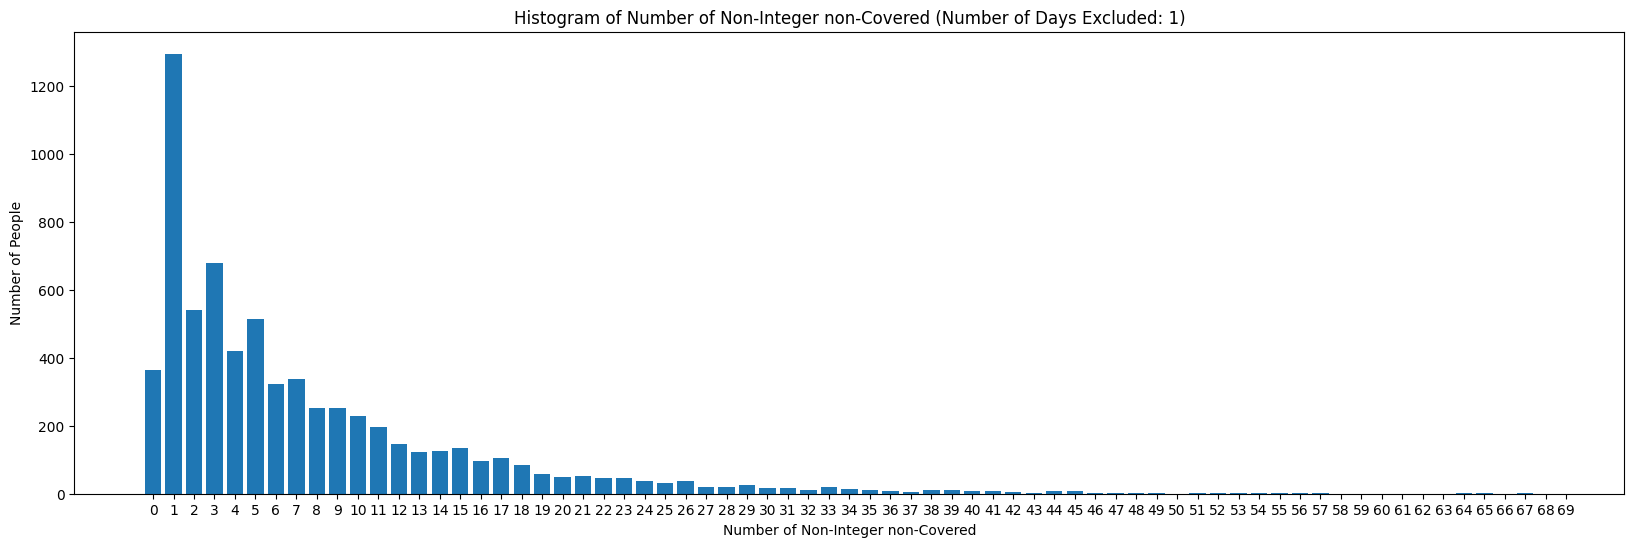

Minimum number of non-integer adherence: 0
Maximum number of non-integer adherence: 67
Mean number of non-integer adherence: 7.45
Standard deviation of non-integer adherence: 8.29

10% percentile of non-integer adherence: 1.0
25% percentile of non-integer adherence: 2.0
Median number of non-integer adherence: 5.0
75% percentile of non-integer adherence: 10.0
90% percentile of non-integer adherence: 18.0


In [23]:
#plot histogram of non_int_adherence_count
plt.figure(figsize=(20, 6))
plt.hist(non_int_adherence_count, bins=range(0, 70), align='left', rwidth=0.8)
plt.xlabel('Number of Non-Integer non-Covered')
plt.ylabel('Number of People')
plt.title(f'Histogram of Number of Non-Integer non-Covered (Number of Days Excluded: {num_days_in_month_to_exclude})')
plt.xticks(range(0, 70, 1))  # Adjust x-axis ticks to show every 5 timesteps
plt.show()

# Print summary statistics
print(f'Minimum number of non-integer adherence: {min(non_int_adherence_count)}')
print(f'Maximum number of non-integer adherence: {max(non_int_adherence_count)}')
print(f'Mean number of non-integer adherence: {np.mean(non_int_adherence_count):.2f}')
print(f'Standard deviation of non-integer adherence: {np.std(non_int_adherence_count):.2f}')
print()
print(f'10% percentile of non-integer adherence: {np.percentile(non_int_adherence_count, 10)}')
print(f'25% percentile of non-integer adherence: {np.percentile(non_int_adherence_count, 25)}')
print(f'Median number of non-integer adherence: {np.median(non_int_adherence_count)}')
print(f'75% percentile of non-integer adherence: {np.percentile(non_int_adherence_count, 75)}')
print(f'90% percentile of non-integer adherence: {np.percentile(non_int_adherence_count, 90)}')


Text(0.5, 1.0, 'Histogram of Number of Integer non-Covered (Number of Days Excluded: 1)')

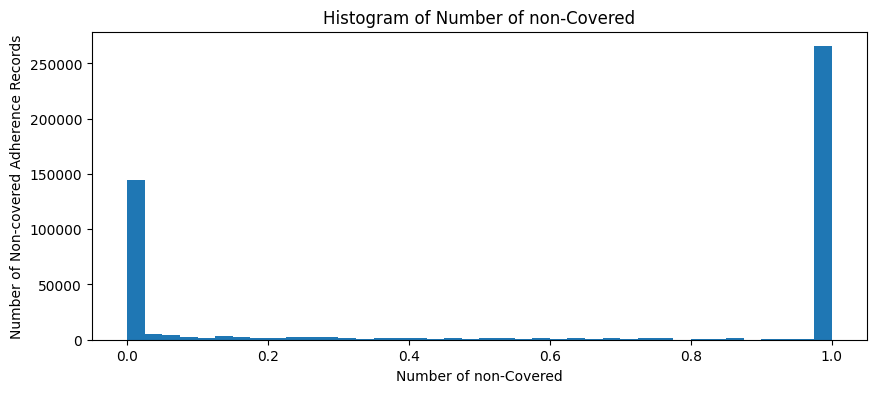

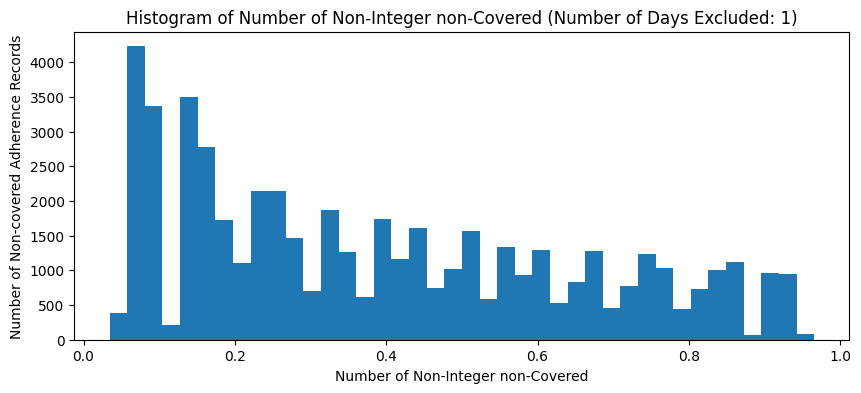

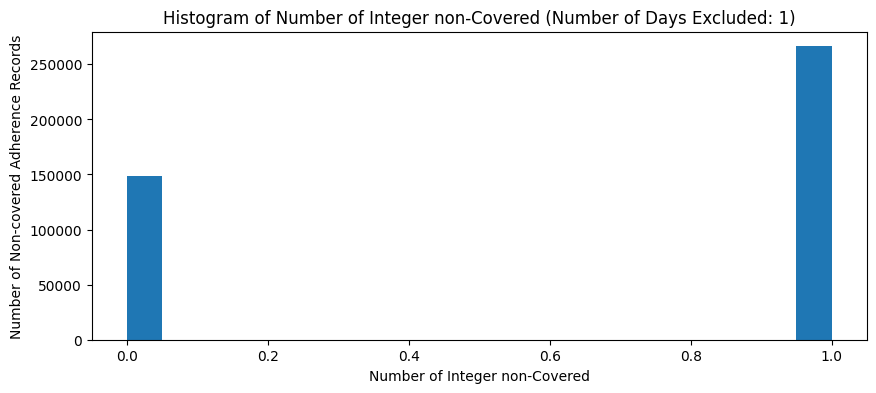

In [24]:
num_days_in_month_to_exclude = 1
total_non_covered_lst = data_df['non_covered_days'].values
trimmed_total_non_covered_lst_non_int = total_non_covered_lst[(0+num_days_in_month_to_exclude/30+1e-6 < total_non_covered_lst) & (total_non_covered_lst < 1-num_days_in_month_to_exclude/30-1e-6)]
trimmed_total_non_covered_lst_int = total_non_covered_lst[(0+num_days_in_month_to_exclude/30+1e-6 >= total_non_covered_lst) | (total_non_covered_lst >= 1-num_days_in_month_to_exclude/30-1e-6)]


#plot histogram of non_int_adherence_count
plt.figure(figsize=(10, 4))
plt.hist(total_non_covered_lst, bins=40)
plt.xlabel('Number of non-Covered')
plt.ylabel('Number of Non-covered Adherence Records')
plt.title(f'Histogram of Number of non-Covered')


#plot histogram of non_int_adherence_count
plt.figure(figsize=(10, 4))
plt.hist(trimmed_total_non_covered_lst_non_int, bins=40)
plt.xlabel('Number of Non-Integer non-Covered')
plt.ylabel('Number of Non-covered Adherence Records')
plt.title(f'Histogram of Number of Non-Integer non-Covered (Number of Days Excluded: {num_days_in_month_to_exclude})')

plt.figure(figsize=(10, 4))
plt.hist(trimmed_total_non_covered_lst_int, bins=20)
plt.xlabel('Number of Integer non-Covered')
plt.ylabel('Number of Non-covered Adherence Records')
plt.title(f'Histogram of Number of Integer non-Covered (Number of Days Excluded: {num_days_in_month_to_exclude})')
